# Exploring Flexible Recommendation System Approaches

This notebook explores flexible approaches for building recommendation systems that address the limitations of static user embeddings, such as the requirement for all users to be present during the training, validation, testing, and inference phases. The goal is to build a dynamic, scalable, and adaptable recommendation system.

---

## Approaches for Flexible Recommendation Systems

### **1. Content-Based Features to Derive Embeddings Dynamically**

This approach dynamically creates embeddings based on user or item metadata rather than relying on pre-trained static embeddings. These embeddings are inferred at runtime, making them inherently flexible.

#### **Key Components**
- **Input Features**:
  - User: Demographics, preferences, purchase history, browsing history.
  - Item: Description, categories, attributes, and tags.
- **Embedding Generation**:
  - Use neural networks (e.g., Feedforward NN, Transformers) to map input features to dense vector embeddings.
  - Content towers (one for users, one for items) process their respective features.
- **Scoring**:
  - Compute compatibility or relevance scores using similarity measures like dot products or cosine similarity.

#### **Advantages**
- **Cold Start**: Works for new users or items since embeddings are derived from their attributes.
- **Scalability**: No need to retrain the model to add new users/items.
- **Customizability**: Embeddings adapt to the richness of input features.

#### **Challenges**
- **Feature Engineering**: High dependency on quality and availability of user/item metadata.
- **Bias**: Over-reliance on certain features may lead to biased recommendations.

#### **Examples**
- Content-based filtering systems using TF-IDF, Word2Vec, or neural embeddings for articles, movies, or products.

---

### **2. Hybrid Models**

Hybrid models combine collaborative filtering (CF) with content-based filtering (CBF) to leverage the strengths of both approaches.

#### **Key Components**
- **Collaborative Filtering**:
  - Extract latent factors from interaction data (e.g., Matrix Factorization, Neural CF).
- **Content-Based Filtering**:
  - Dynamically generate embeddings from user/item metadata using neural networks or classical techniques.
- **Fusion Strategies**:
  - **Concatenation**: Combine CF embeddings with CBF embeddings before scoring.
  - **Gating Mechanisms**: Use attention or learned weights to balance CF and CBF contributions.
  - **Ensemble Models**: Independently train CF and CBF models and blend their predictions.

#### **Advantages**
- **Robustness**: Handles both sparse interactions and cold starts effectively.
- **Dynamic Adaptability**: Incorporates user preferences from metadata while leveraging collaborative signals.
- **Improved Accuracy**: Better generalization from combined strengths of CF and CBF.

#### **Challenges**
- **Complexity**: Higher computational and architectural complexity.
- **Data Imbalance**: Requires balancing CF and CBF contributions during training.

#### **Examples**
- Netflix's hybrid recommendation system that combines viewing history (CF) with metadata like genres, actors, and directors (CBF).
- Neural networks blending user-item embeddings with metadata embeddings.

---

### **3. Models Agnostic to User Count**

These models do not require a fixed set of users or items, making them ideal for dynamic environments with an evolving user base.

#### **Key Approaches**
- **Meta-Learning**:
  - Train a model to generalize across tasks (e.g., user-item interactions) so it can adapt quickly to new users/items.
  - Examples: MAML (Model-Agnostic Meta-Learning).
- **Few-Shot Learning**:
  - Learn embeddings for new users/items with limited data.
  - Examples: Prototypical Networks, Siamese Networks.
- **Generalized Factorization Machines**:
  - Extends factorization models to support additional context (e.g., time, location, device).
- **Graph Neural Networks (GNNs)**:
  - Represent user-item interactions as a graph and learn embeddings for nodes (users/items) dynamically.
  - Examples: PinSage, GraphSAGE, LightGCN.

#### **Advantages**
- **Dynamic User/Item Base**: No dependency on pre-trained static embeddings.
- **Cold Start**: Handles new users/items with few interactions.
- **Scalability**: Efficient for large datasets with evolving user/item sets.

#### **Challenges**
- **Data Sparsity**: Requires robust mechanisms to handle sparse interaction data.
- **High Complexity**: GNNs and meta-learning approaches can be computationally intensive.

#### **Examples**
- Pinterest’s PinSage for dynamic recommendations.
- GNN-based recommendation systems that dynamically generate node embeddings.

---

## Summary of Approaches

| **Aspect**                  | **Content-Based Features**          | **Hybrid Models**                     | **User-Count Agnostic Models**            |
|-----------------------------|-------------------------------------|---------------------------------------|-------------------------------------------|
| **Dynamic Embeddings**      | Yes                                | Yes                                   | Yes                                       |
| **Cold Start Handling**     | Strong                             | Moderate to Strong                   | Strong                                    |
| **Complexity**              | Low to Moderate                    | High                                  | High                                      |
| **Scalability**             | High                               | Moderate                              | High                                      |
| **Training Needs**          | Metadata and content only          | Interaction and metadata              | Interaction-focused with adaptability     |
| **Examples**                | TF-IDF, Word2Vec, Content Towers   | Neural CF + Metadata, Netflix Hybrid | Meta-Learning, GNNs, Few-Shot Learning    |

---


# Understanding the Difference Between Collaborative Filtering and Content-Based Filtering

## **1. Collaborative Filtering**

### **Definition**
Collaborative filtering relies on **interaction data** (e.g., ratings, clicks) between users and items. It analyzes patterns in user-item interactions to make recommendations, often without relying on metadata about users or items.

### **Key Characteristics**
- **User-Collaborative Filtering**:
  - Finds similarities between users based on their interactions.
  - Example: "Users similar to you liked this movie."
  - Techniques:
    - User-User Similarity (e.g., k-NN).
    - Matrix Factorization (e.g., SVD, ALS).
    - Neural approaches like Autoencoders or Static Embedding Nets.
- **Item-Collaborative Filtering**:
  - Finds similarities between items based on how they are interacted with by users.
  - Example: "People who watched this movie also watched these movies."
  - Techniques:
    - Item-Item Similarity.
    - Co-occurrence-based models.

### **Dependency on Interaction Data**
- Collaborative filtering models are built entirely on **user-item interaction data** (e.g., a user-item rating matrix).
- They do not require metadata about users or items.

---

## **2. Content-Based Filtering**

### **Definition**
Content-based filtering focuses on **attributes (metadata)** of users and items to make recommendations. It matches users with items that are similar to what they have interacted with, based on the attributes of the content.

### **Key Characteristics**
- **Profiles Derived from Metadata**:
  - User profiles are based on user attributes (e.g., age, favorite genres, sex).
  - Item profiles are based on item attributes (e.g., budget, genres, overview embedding).
- **No Dependence on Interaction Data**:
  - Recommendations are generated by comparing user profiles with item profiles.
  - No need for explicit user-user or item-item interactions.

---

## **3. Differences Between Collaborative and Content-Based Filtering**

| **Aspect**                  | **Collaborative Filtering**                                                                                     | **Content-Based Filtering**                                                                                  |
|-----------------------------|----------------------------------------------------------------------------------------------------------------|-------------------------------------------------------------------------------------------------------------|
| **Core Idea**               | Learns from patterns in user-item interactions.                                                               | Matches user and item profiles based on their metadata.                                                    |
| **Dependence on IDs**       | Requires user and item IDs to track interactions.                                                             | Does not require IDs, works purely on attributes (metadata).                                               |
| **Dependency on Metadata**  | Metadata is optional; interactions alone are sufficient.                                                      | Heavily dependent on metadata for users and items.                                                         |
| **Generalization**          | Cannot recommend items without interaction data (cold-start issue).                                           | Can generalize well to new users or items if metadata is available.                                        |
| **Example Techniques**      | Matrix Factorization, User-User Similarity, Neural Collaborative Filtering (NCF).                             | SBERT-based Profiles, One-Hot Encoding for Genres, Learned Embeddings for Attributes.                      |

---

## **4. Current Approach**

### **Key Characteristics**
- **Profiles Derived from Metadata**:
  - User profiles include attributes such as age, multi-hot encoded genres, and sex.
  - Movie profiles include numerical features (e.g., budget, runtime), multi-hot encoded genres, and text embeddings (e.g., for overviews).
- **No Dependence on Interaction Patterns**:
  - The model does not rely on user-user or item-item relationships in the interaction data.
  - It abstracts away concrete user and item IDs.

### **Conclusion**
The current approach of this notebook aligns with **content-based filtering**, as it uses metadata-driven profiles to make recommendations. For collaborative filtering, you would need to reintroduce **user and item IDs** and focus on learning from user-item interaction data.


# Content-Based Features Approach for Recommendation Systems

This notebook explores the **Content-Based Features Approach** for building a recommendation system, focusing on dynamically deriving embeddings from user and item metadata. This approach addresses the limitations of static embeddings, such as the inability to handle new users or items without retraining.

---

## **Data Pipeline and Neural Network Architecture**

### **1. Data Pipeline Architecture**

| **Stage**                | **Content-Based Approach**                                                                                    | **Static Embedding Approach (StaticEmbeddingNCF)**                                           |
|---------------------------|----------------------------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------------|
| **Input Data**            | - **User Metadata**: Features like age, location, interests, purchase history.                              | - **User IDs**: Numerical identifiers mapped to embeddings.                           |
|                           | - **Item Metadata**: Features like genre, description, attributes, tags.                                    | - **Item IDs**: Numerical identifiers mapped to embeddings.                           |
|                           | - **Interaction Data**: Ratings or implicit signals (clicks, purchases).                                    | - **Interaction Data**: Ratings or implicit signals (clicks, purchases).             |
| **Feature Engineering**   | - Normalize, encode, or embed metadata (e.g., one-hot encoding, embeddings for text).                       | - Precompute static embeddings for users and items.                                   |
|                           | - Optionally, use pre-trained embeddings for textual or categorical metadata (e.g., BERT, GloVe).           | - No direct dependency on feature engineering beyond interaction matrix setup.        |
| **Data Splitting**        | - Can include unseen users/items in test/validation sets (no fixed set of user IDs).                        | - Requires all user and item IDs to be present in train, val, test, and inference.    |
| **Data Loader Output**    | - Metadata tensors (user and item), and interaction labels (ratings).                                       | - User and item IDs, interaction labels (ratings).                                    |

---

### **2. Neural Network Architecture**

| **Component**           | **Content-Based Features**                                                                                | **Static Embedding Approach (EnhancedNCF)**                                           |
|--------------------------|----------------------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------------|
| **Embedding Generation** | - **User Content Tower**: A fully connected network maps user metadata to dense embeddings.              | - User embeddings are static, learned directly from ID mappings during training.      |
|                          | - **Item Content Tower**: A fully connected network maps item metadata to dense embeddings.              | - Item embeddings are static, learned directly from ID mappings during training.      |
|                          | - Input flexibility: Metadata embeddings can adapt dynamically for new users/items.                     | - Requires fixed embedding layers initialized for known user/item IDs.                |
| **Interaction Layer**    | - Combines dynamically generated user and item embeddings (e.g., concatenation, dot product).            | - Combines static user and item embeddings (e.g., concatenation, dot product).        |
| **Prediction Layer**     | - Fully connected layers predict interaction scores (ratings or clicks).                                | - Fully connected layers predict interaction scores.                                  |
| **Loss Function**        | - Regression loss (e.g., MSE for ratings) or classification loss (e.g., cross-entropy for implicit tasks).| - Similar loss functions; no difference in implementation.                            |

---

## **Architectural Comparison**

### **Data Flow**
- **Static Embedding (StaticEmbeddingNCF)**:
  - User and item embeddings are pre-trained for known IDs.
  - Embeddings cannot generalize to new users/items without retraining.
  - **Limitation**: Inflexible to dynamic changes in users or items.

- **Content-Based Features**:
  - User and item embeddings are computed dynamically based on their metadata.
  - System can generalize to new users/items if metadata is available.
  - **Advantage**: Flexible and handles cold starts effectively.

### **Embedding Adaptability**
- **Static Embedding**:
  - Fixed size and count for embeddings, directly tied to the number of users and items.
  - Scaling requires re-training or embedding extensions.

- **Content-Based Features**:
  - Embeddings derived from feature space, independent of dataset size.
  - No need for re-training when new users/items are introduced.

### **Cold Start Problem**
- **Static Embedding**:
  - Suffers in cold-start scenarios as new users/items lack pre-trained embeddings.

- **Content-Based Features**:
  - Resolves cold starts using metadata-derived embeddings for unseen users/items.

---

## **Data Preconditions for Content-Based Features**

1. **Metadata Availability**:
   - Sufficient and relevant metadata for users and items.
   - Examples:
     - **Users**: Age, gender, preferences, device type, location.
     - **Items**: Title, genre, description, price, category.

2. **Data Cleaning and Encoding**:
   - Normalize numerical features (e.g., Min-Max Scaling, Standardization).
   - Encode categorical features (e.g., one-hot, label encoding, or embeddings).
   - Preprocess text data (e.g., tokenization, embeddings like Word2Vec or BERT).

3. **Interaction Data**:
   - User-item interaction data (explicit ratings or implicit signals like clicks/purchases).
   - Train/test split should ensure no data leakage while including unseen users/items.

4. **Feature Balance**:
   - Ensure balanced contributions from user and item metadata to avoid overfitting on dominant feature sets.

---

## **Proposed Neural Network Architecture**

1. **Input Layers**:
   - User metadata features: $ \text{num\_user\_features} $
   - Item metadata features: $ \text{num\_item\_features} $

2. **Embedding Towers**:
   - User content tower:
     $$
     \text{User\_Embedding} = \text{FC}_{1}(\text{user\_features}) \rightarrow \text{ReLU} \rightarrow \ldots \rightarrow \text{FC}_{n}
     $$
   - Item content tower:
     $$
     \text{Item\_Embedding} = \text{FC}_{1}(\text{item\_features}) \rightarrow \text{ReLU} \rightarrow \ldots \rightarrow \text{FC}_{n}
     $$

3. **Interaction Layer**:
   - Combine user and item embeddings via concatenation or element-wise operations.
   - Example:
     $$
     \text{Combined} = [\text{User\_Embedding}, \text{Item\_Embedding}]
     $$

4. **Prediction Layer**:
   - Fully connected layers output the predicted score:
     $$
     \text{Output} = \text{FC}_{m}(\text{Combined})
     $$

5. **Loss**:
   - MSE (ratings prediction) or Cross-Entropy (implicit feedback).

---


## How Content-Based Features Replace User IDs in Recommendation Systems

In a **Content-Based Features Approach**, the architecture shifts focus from concrete user IDs (this was probably motivated from the factorization of R in P*Q) to abstract user profiles represented by metadata. This fundamentally changes how the model perceives and interacts with users, providing flexibility and generalizability.

---

### **Static Embedding Approach (User IDs)**

1. **User IDs as Input**:
   - User IDs are treated as discrete categorical values, mapped directly to static embedding vectors.
   - Example: User `123` maps to a specific embedding vector (e.g., `Embedding[123]`).

2. **Model Dependency**:
   - The model explicitly knows each user by ID.
   - To add a new user, a new embedding vector must be trained, requiring retraining of the embedding layer.

3. **Representation**:
   - The user representation is purely based on learned embeddings tied to their interactions.
   - **Problem**: This representation is non-generalizable and tightly coupled to the training data.

---

### **Content-Based Features Approach**

1. **User Metadata as Input**:
   - Users are represented by their **metadata** (e.g., age, gender, location, preferences, etc.).
   - No explicit user ID is required in the model's architecture.
   - Example: User metadata like `{"age": 25, "location": "NY", "interests": "action movies"}` is encoded into a feature vector.

2. **Model Generalization**:
   - The model does not "know" users as specific IDs.
   - Instead, it processes user metadata dynamically to generate embeddings during inference.
   - **Benefit**: New users with metadata can be represented without retraining.

3. **Representation**:
   - The user representation (embedding) is derived from their metadata features.
   - **Advantage**: This representation is generalizable and flexible for unseen users.

---

### **What Happens in the Architecture**

#### **Static Embedding Layers (Static IDs)**
- In the static approach, user IDs are fed into an embedding layer to look up a pre-trained vector:
  $$
  \text{User\_Embedding} = \text{Embedding}[User\_ID]
  $$
- This embedding is static and tied to specific user IDs.

#### **Content Towers (Metadata-Based)**
- In the content-based approach, user metadata is passed through a neural network to produce the embedding dynamically:
  $$
  \text{User\_Embedding} = \text{FC}_{1}(\text{Metadata}) \rightarrow \text{ReLU} \rightarrow \ldots \rightarrow \text{FC}_{n}
  $$
- The embedding is generated "on the fly" and is **independent of specific user IDs**.

---

### **Does the New Architecture "Know" Concrete Users?**

**No**, the new architecture does not explicitly "know" concrete users by their IDs. Instead:

- **What the Model Sees**:
  - A vectorized representation of the user's metadata.
  - This abstraction means the model processes users purely based on their characteristics, not their identities.

- **What the Model Learns**:
  - Patterns between metadata-derived embeddings and interaction outcomes (e.g., ratings, clicks).

- **Inference for New Users**:
  - For a new user with metadata, the model can derive a new embedding dynamically, even though it has never seen the user ID before.

---

### **Analogy**

Think of the static embedding approach as a school class where the teacher knows each student by their name (user ID). When a new student joins, the teacher cannot recognize or understand them without explicitly learning about them first.

In contrast, the content-based approach is like a teacher who knows about students based on their interests, skills, and behaviors (metadata). Even if a new student joins, the teacher can immediately understand them based on these characteristics, without needing to memorize their name.

---

### **Key Benefits of Removing User ID Dependency**

1. **Cold Start**:
   - New users can be served recommendations immediately if their metadata is available.

2. **Generalization**:
   - The model learns to recommend based on user characteristics rather than memorizing specific user interactions.

3. **Scalability**:
   - The system scales to millions of users without retraining embedding layers or worrying about embedding size limits.

4. **Flexibility**:
   - Users can dynamically change their preferences (metadata) and receive updated recommendations.

---

### **What About Items?**

This same principle applies to items. Instead of relying on static item IDs:
- Use **item metadata** (e.g., genres, tags, descriptions) to dynamically create embeddings.
- The model does not need to "know" specific items, allowing it to generalize to new items added to the catalog.

---


# Content-Based Features Approach: Training and Inference Workflow

## **1. Training Phase**

### **Inputs**
- **User Profiles**: Precomputed profiles based on enriched metadata (e.g., demographics, favorite genres).
- **Item Profiles**: Precomputed profiles derived from metadata (e.g., genres, plot summaries).
- **Ratings**: Interaction data linking users and items with a rating (or implicit feedback like clicks).

### **Process**
- The model learns a mapping from user and item profiles to interaction scores (ratings).
- Training data contains only users and items with known interactions.

### **Output**
- A trained model capable of predicting ratings for any user-item pair based on their profiles.

---

## **2. Inference Phase**

### **Goal**
To predict ratings (or relevance scores) for new or existing users and items, even if they were not seen during training.

### **How It Works**
1. **Existing Users and Items**:
   - The precomputed profiles are used directly.
   - The model predicts the rating for a given user-item pair.

2. **New Users (Cold Start)**:
   - Create a user profile on-the-fly using metadata (e.g., "age: 25, favorite genres: action, drama").
   - This profile is fed into the trained model alongside item profiles to generate predictions.

3. **New Items (Cold Start)**:
   - Create an item profile dynamically using metadata (e.g., "action, runtime: 90 minutes, overview: exciting thriller").
   - This profile is used with user profiles to generate predictions.

4. **New Users + New Items**:
   - Both profiles are created dynamically from metadata and used to predict ratings.

---

## **Advantages of this Approach**

1. **Cold-Start Resolution**:
   - New users and items are seamlessly integrated using their metadata, without needing interaction data.

2. **Scalability**:
   - Profiles can be generated dynamically, allowing the system to scale with minimal retraining.

3. **Flexibility**:
   - Metadata-rich environments benefit as the system learns to utilize features effectively.

---

## **Example Workflow**

### **Training**
- **Input**:
  - User Profile: `[age, num_reviews, avg_rating, embedding_favorite_genres, embedding_spending_category]`
  - Item Profile: `[budget, runtime, popularity, embedding_genres, embedding_overview]`
  - Rating: `4.5`
- **Model**:
  - Learns to map profiles to ratings.
- **Output**:
  - A trained model.

### **Inference**
- **Scenario 1: Existing User + Existing Item**:
  - Use stored profiles directly to predict the rating.
- **Scenario 2: New User**:
  - Example:
    - Metadata: `{"age": 30, "favorite_genres": "action, thriller"}`
    - Create a profile dynamically: `[30, embedding_favorite_genres]`
    - Predict ratings for items using this profile.
- **Scenario 3: New Item**:
  - Example:
    - Metadata: `{"genres": "sci-fi, adventure", "overview": "space exploration"}`
    - Create a profile dynamically: `[embedding_genres, embedding_overview]`
    - Predict ratings for users using this profile.

---

# Handling Users/Movies Without Ratings in the Content-Based Approach

## **1. Users/Movies Without Ratings in Training**

### **Assumptions**
- In **training**, only users and movies with interactions (ratings) are included. This is because:
  - The model learns the relationship between user and item profiles through interaction data.
  - Without interactions, there is no ground truth to train on.

### **Real-Life Handling**
- **Training Stage**:
  - **Users/Movies Without Ratings**:
    - These are not included in training since they lack interaction data.
    - However, their profiles are typically precomputed and stored, so they can be utilized later during inference.
  - **Cold Start in Training**:
    - For new users or items added over time, metadata (e.g., textual descriptions, genres) is used to dynamically create profiles, even if interactions are sparse.

---

## **2. Users/Movies Without Ratings During Inference**

### **Assumptions**
- In **inference**, the system must handle unseen users or movies (cold start).

### **How It Works**
- **Unseen Users**:
  - A new user's metadata is used to generate a dynamic profile (e.g., using demographic information, browsing history, or preferences).
  - This profile is fed into the model to compute recommendations, without requiring prior ratings.
- **Unseen Movies**:
  - A new movie's metadata (e.g., genres, descriptions, cast) is used to create its profile dynamically.
  - Recommendations are computed for the movie based on its profile, even if no interactions are available.

---

## **Practical Approaches to Cold Start**

1. **Content-Based Features**:
   - Dynamically derive embeddings for new users or items using metadata.
   - Example:
     - For a new user: Use their demographic or preference data (e.g., "age: 25, likes action movies").
     - For a new movie: Use its metadata (e.g., "action, runtime: 90 minutes, starring XYZ").
   - This ensures the system remains flexible and handles cold-start scenarios effectively.

2. **Pre-Trained Models**:
   - Use pre-trained embeddings (e.g., from text models like BERT or Sentence-BERT) for metadata fields.
   - This allows unseen entities to be represented consistently using their attributes.

3. **Hybrid Models**:
   - Combine content-based features with collaborative filtering during inference.
   - If sufficient interaction data becomes available for a user/movie, collaborative filtering signals augment recommendations.

---

## **Pipeline Summary for Real Life**

1. **Training**:
   - Train only on users and items with ratings (interaction data).
   - Ensure all available metadata is preprocessed for future use.

2. **Inference**:
   - Dynamically create profiles for new users and items using their metadata.
   - Leverage learned patterns to provide recommendations, even for cold-start entities.


# Building the data pipeline
The following code builds the data pipeline so that we have usable data loaders.

In [5]:
# Imports and configuration
import pandas as pd
import numpy as np
import torch
from torch.utils.data import DataLoader
from sentence_transformers import SentenceTransformer
import os
from codebase.data import multi_hot_encode_genres, one_hot_encode_sex, normalize_numeric_column, scale_one_hot_to_max, scale_multi_hot_to_embedding, encode_text

# Paths and configurations
RATINGS_PATH = 'data/ml-latest-small/ratings.csv'
MOVIES_ENRICHED_PATH = 'data/ml-latest-small/movies_enriched.csv'
USER_ENRICHED_PATH = 'data/ml-latest-small/users_enriched.csv'
USER_EMBEDDINGS_PATH = 'data/ml-latest-small/user_profiles.npy'
MOVIE_EMBEDDINGS_PATH = 'data/ml-latest-small/movie_profiles.npy'
BATCH_SIZE = 2048
MODEL_NAME = 'all-mpnet-base-v2'

os.environ["TOKENIZERS_PARALLELISM"] = "false"

# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Sentence transformer model for text embeddings
text_model = SentenceTransformer(MODEL_NAME).to(device)

def create_movie_profiles(movies_df, genre_vocab):
    """Create movie profiles by combining numerical, text, and multi-hot features."""
    
    # Multi-hot encode genres
    movie_genres_encoded = multi_hot_encode_genres(movies_df, genre_vocab, split='|')

    # Generate embeddings for overview
    movie_overview_embeddings = encode_text(movies_df['overview'].tolist(), text_model)

    # Scale multi-hot encoded genres to match the embedding max value
    #scaled_movie_genres = scale_multi_hot_to_embedding(movie_genres_encoded, movie_overview_embeddings)

    # Normalize numerical features
    for col in ['budget', 'popularity', 'runtime', 'vote_average', 'vote_count']:
        if col in movies_df.columns:
            # Replace NaN values with 0 before normalization
            movies_df[col] = movies_df[col].fillna(0)
            # Normalize the column
            movies_df = normalize_numeric_column(movies_df, col)

    # Combine all features into profiles
    movie_profiles = []
    for i, row in movies_df.iterrows():
        profile = np.concatenate((
            np.array([row[col] for col in ['budget', 'popularity', 'runtime', 'vote_average', 'vote_count']]),
            movie_overview_embeddings[i],
            movie_genres_encoded[i]
        ))
        movie_profiles.append(profile)

    return np.array(movie_profiles)

# Step 2: Precompute User and Movie Profiles
def create_user_profiles(users_df, genre_vocab):
    """Create user profiles using age, sex, and favorite_genres."""
            
    users_df['favorite_genres'] = users_df['favorite_genres'].fillna('')
    users_df['sex'] = users_df['sex'].fillna('Unknown')

    # Encode favorite genres using multi-hot encoding
    user_genres_encoded = multi_hot_encode_genres(
        users_df, genre_vocab, split=',', genres_column='favorite_genres')

    # One-hot encode sex
    user_sex_one_hot = one_hot_encode_sex(users_df, 'sex')

    # Normalize numerical feature: age
    users_df = normalize_numeric_column(users_df, 'age')

    # Combine numerical features and embeddings (without one-hot yet)
    profiles_without_one_hot = []
    for i, row in users_df.iterrows():
        profile = np.concatenate((
            np.array([row['age']]),   # Numerical features
            user_genres_encoded[i] # Favorite genres embedding
        ))
        profiles_without_one_hot.append(profile)

    # Convert profiles to a NumPy array for scaling
    profiles_without_one_hot = np.array(profiles_without_one_hot)

    # Dynamically scale the one-hot features
    user_sex_scaled = scale_one_hot_to_max(user_sex_one_hot, profiles_without_one_hot)

    # Append the scaled one-hot features to the profiles
    user_profiles = []
    for i in range(len(users_df)):
        profile = np.concatenate((
            profiles_without_one_hot[i],
            user_sex_scaled[i]
        ))
        user_profiles.append(profile)

    return np.array(user_profiles)

In [6]:
# Watch for changes
%load_ext autoreload
%autoreload 2

from codebase.data import extract_genre_labels, ContentFeatureMovieLensDataset

# Load data
ratings = pd.read_csv(RATINGS_PATH)
movies_enriched = pd.read_csv(MOVIES_ENRICHED_PATH)
users_enriched = pd.read_csv(USER_ENRICHED_PATH)

# Combine favorite genres from users and genres from movies
genre_vocab = sorted(
    set(
        [genre.strip() for genre in ','.join(users_enriched['favorite_genres'].dropna()).split(',')] +
        [genre.strip() for genre in '|'.join(movies_enriched['genres'].dropna()).split('|')]
    )
)

print("All Genres:", genre_vocab)
print(f"Genres count: {len(genre_vocab)}")

print(f"Unique Users in ratings: {ratings['userId'].nunique()}")

# Step 1: Restrict valid_user_ids and valid_movie_ids to those in ratings
valid_user_ids = set(ratings['userId'].unique()).intersection(set(users_enriched['userId'].unique()))
valid_movie_ids = set(ratings['movieId'].unique()).intersection(set(movies_enriched['movieId'].unique()))

print(f"Number of valid users: {len(valid_user_ids)}")
print(f"Number of valid movies: {len(valid_movie_ids)}")

# Filter ratings to include only valid userIds and movieIds
ratings = ratings[
    (ratings['userId'].isin(valid_user_ids)) &
    (ratings['movieId'].isin(valid_movie_ids))
]

print(f"Number of ratings after filtering: {len(ratings)}")

# Create mappings from userId and movieId to indices
user_id_to_index = {user_id: idx for idx, user_id in enumerate(valid_user_ids)}
movie_id_to_index = {movie_id: idx for idx, movie_id in enumerate(valid_movie_ids)}

# Add profile indices to the ratings dataframe
# map expects a dictionary and can then map the values of the column to the keys of the dictionary
ratings['userIndex'] = ratings['userId'].map(user_id_to_index) 
ratings['movieIndex'] = ratings['movieId'].map(movie_id_to_index)

# Create a dictionary mapping each user to their interacted movies
user_to_interacted_movies = (
    ratings.groupby("userIndex")["movieIndex"].apply(list).to_dict()
)

# Step 2: Check and create/load profiles
if os.path.exists(USER_EMBEDDINGS_PATH):
    print("Loading user profiles from disk...")
    user_profiles = np.load(USER_EMBEDDINGS_PATH)
else:
    print("Creating user profiles...")
    user_profiles = create_user_profiles(
        users_enriched[users_enriched['userId'].isin(valid_user_ids)].reset_index(drop=True), genre_vocab)
    
    np.save(USER_EMBEDDINGS_PATH, user_profiles)
    print("User profiles saved to disk.")

if os.path.exists(MOVIE_EMBEDDINGS_PATH):
    print("Loading movie profiles from disk...")
    movie_profiles = np.load(MOVIE_EMBEDDINGS_PATH)
else:
    print("Creating movie profiles...")
    movie_profiles = create_movie_profiles(
        movies_enriched[movies_enriched['movieId'].isin(valid_movie_ids)].reset_index(drop=True), genre_vocab)
    
    np.save(MOVIE_EMBEDDINGS_PATH, movie_profiles)
    print("Movie profiles saved to disk.")

# Step 3: Temporal split of ratings data
def temporal_split(ratings_df):
    """Split ratings data into train, validation, and test sets temporally."""
    ratings_df = ratings_df.sort_values('timestamp')
    train_end = int(0.7 * len(ratings_df))
    val_end = int(0.85 * len(ratings_df))
    train_data = ratings_df.iloc[:train_end]
    val_data = ratings_df.iloc[train_end:val_end]
    test_data = ratings_df.iloc[val_end:]
    return train_data, val_data, test_data

train_data, val_data, test_data = temporal_split(ratings)

# Prepare genre labels for training, validation, and test datasets
train_genre_labels = extract_genre_labels(train_data, movie_profiles, genre_vocab=genre_vocab)
val_genre_labels = extract_genre_labels(val_data, movie_profiles, genre_vocab=genre_vocab)
test_genre_labels = extract_genre_labels(test_data, movie_profiles, genre_vocab=genre_vocab)

# Step 4: Create Dataloaders
train_dataset = ContentFeatureMovieLensDataset(train_data, user_profiles, movie_profiles, train_genre_labels)
val_dataset = ContentFeatureMovieLensDataset(val_data, user_profiles, movie_profiles, val_genre_labels)
test_dataset = ContentFeatureMovieLensDataset(test_data, user_profiles, movie_profiles, test_genre_labels)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=12)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, num_workers=12)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, num_workers=12)

print("Data preparation complete!")
print(f"Train samples: {len(train_dataset)}")
print(f"Validation samples: {len(val_dataset)}")
print(f"Test samples: {len(test_dataset)}")

# Test the dataloaders
for user, movie, rating, genre_labels in train_loader:
    print("User shape (Train):", user.shape)
    print("Movie shape (Train):", movie.shape)
    print("Rating shape: (Train)", rating.shape)
    print("Genre labels shape (Train):", genre_labels.shape)
    print("Sample genre labels:", genre_labels[0])  # Check the first sample's genre labels
    
    break


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
All Genres: ['(no genres listed)', 'Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
Genres count: 20
Unique Users in ratings: 610
Number of valid users: 610
Number of valid movies: 9724
Number of ratings after filtering: 100836
Creating user profiles...
DEBUG: Computed max absolute value in profiles: 1.0
User profiles saved to disk.
Creating movie profiles...
Movie profiles saved to disk.
Data preparation complete!
Train samples: 70585
Validation samples: 15125
Test samples: 15126
User shape (Train): torch.Size([2048, 23])
Movie shape (Train): torch.Size([2048, 793])
Rating shape: (Train) torch.Size([2048])
Genre labels shape (Train): torch.Size([2048, 20])
Sample genre labels: tensor([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 

## Let's inspect the data and the pipeline we just created:

In [7]:
def test_genre_label_alignment(movies_enriched, movie_profiles, genre_vocab):
    """
    Test if genre labels align with the ground truth in the movies_enriched DataFrame.
    
    Args:
        movies_enriched (pd.DataFrame): DataFrame with original movie genres.
        movie_profiles (np.ndarray): Precomputed movie profiles containing multi-hot encoded genres.
        genre_vocab (list): List of all possible genres in sorted order.

    Returns:
        None. Prints results of the test.
    """
    # Extract the multi-hot encoded genres from movie_profiles
    num_movies = len(movie_profiles)
    
    genre_profiles = movie_profiles[:, -len(genre_vocab):]  # Assuming genres are the last features
    
    mismatch_count = 0

    # Iterate through movies and compare the genres
    for idx in range(num_movies):
        # Original genres as a set
        original_genres = set(
            [genre.strip() for genre in movies_enriched.iloc[idx]['genres'].split('|') if genre.strip()]
        )

        # Multi-hot decoded genres
        decoded_genres = {genre_vocab[i] for i, value in enumerate(genre_profiles[idx]) if value > 0}
        
        # Check if they match
        if original_genres != decoded_genres:
            mismatch_count += 1
            print(f"Mismatch for movie at index {idx}:")
            print(f"Original genres: {original_genres}")
            print(f"Decoded genres: {decoded_genres}")
            print("---")
    
    # Summary
    if mismatch_count == 0:
        print("All genre labels align perfectly with the ground truth!")
    else:
        print(f"Total mismatches: {mismatch_count}/{num_movies}")

# Call the test function
test_genre_label_alignment(
    movies_enriched[movies_enriched['movieId'].isin(valid_movie_ids)], movie_profiles, genre_vocab)


All genre labels align perfectly with the ground truth!


### Test the data loader in train mode

In [8]:
# Example: Testing the ContentFeatureMovieLensDataset
def test_dataset_train_mode(dataset, num_samples=10):
    """
    Test the ContentFeatureMovieLensDataset to verify it repeats user_profiles for corresponding movie_items.
    Args:
        dataset (Dataset): The dataset to test.
        num_samples (int): Number of samples to print for testing.
    """
    print("Testing the dataset...\n")
    print("Sample outputs (user_profile, movie_profile, rating):\n")

    for i in range(min(num_samples, len(dataset))):
        user_profile, movie_profile, rating, genre_labels = dataset[i]
        print(f"User Profile: {user_profile.numpy()[:5]}...")  # Print first 5 values of user profile
        print(f"Movie Profile: {movie_profile.numpy()[:5]}...")  # Print first 5 values of movie profile
        print(f"Rating: {rating.item()}")
        print(f"Genre Labels: {genre_labels.numpy()[:5]}...")  # Print first 5 values of movie profile
        print("-" * 50)

# Create a test dataset instance
# Assuming you already have these variables from your preprocessing:
# - ratings (DataFrame with 'userIndex', 'movieIndex', 'rating')
# - user_profiles (numpy array)
# - movie_profiles (numpy array)

test_dataset_instance = ContentFeatureMovieLensDataset(
    ratings, user_profiles, movie_profiles, genre_labels)

# Test the dataset
test_dataset_train_mode(test_dataset_instance, num_samples=10)

Testing the dataset...

Sample outputs (user_profile, movie_profile, rating):

User Profile: [0.44680852 0.         1.         0.         0.        ]...
Movie Profile: [0.07915568 0.24803227 0.13893653 0.89561796 0.5019906 ]...
Rating: 4.0
Genre Labels: [0. 0. 0. 0. 0.]...
--------------------------------------------------
User Profile: [0.44680852 0.         1.         0.         0.        ]...
Movie Profile: [0.06596306 0.02415679 0.17324185 0.7303371  0.01033486]...
Rating: 4.0
Genre Labels: [0. 0. 0. 0. 0.]...
--------------------------------------------------
User Profile: [0.44680852 0.         1.         0.         0.        ]...
Movie Profile: [0.15831135 0.12664984 0.2915952  0.8876405  0.19914377]...
Rating: 4.0
Genre Labels: [0. 0. 0. 0. 0.]...
--------------------------------------------------
User Profile: [0.44680852 0.         1.         0.         0.        ]...
Movie Profile: [0.01583114 0.0815604  0.18181819 0.9188764  0.28340423]...
Rating: 5.0
Genre Labels: [0. 0. 0

/home/oliver/project-showroom/projects/recommendation-system/codebase/data.py:423: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  genre_labels = torch.tensor(self.genre_labels[idx], dtype=torch.float32)  # Multi-hot genre labels


### Check for NaN:

In [6]:
import numpy as np

def analyze_nan_in_movie_profiles(movie_profiles, column_structure):
    """
    Analyze `movie_profiles` for NaN values and identify affected columns and profiles.
    Args:
        movie_profiles (np.ndarray): Array of movie profiles.
        column_structure (dict): Dictionary defining column ranges for each feature type.
            Example: {
                "numerical_features": (0, 5),  # Start and end index for numerical features
                "overview_embedding": (5, 773),
                "scaled_genres": (773, 791)
            }
    Returns:
        dict: Analysis results, including affected column groups and profile count.
    """
    nan_counts = {}
    total_nan_profiles = 0

    # Analyze each feature group based on column structure
    for feature, (start, end) in column_structure.items():
        feature_data = movie_profiles[:, start:end]
        nan_mask = np.isnan(feature_data)
        nan_count = np.sum(nan_mask)
        nan_profiles = np.sum(np.any(nan_mask, axis=1))  # Profiles with at least one NaN in this range

        nan_counts[feature] = {
            "total_nans": nan_count,
            "affected_profiles": nan_profiles
        }
        total_nan_profiles += nan_profiles

    # Ensure total_nan_profiles isn't double-counted
    total_nan_profiles = np.sum(np.any(np.isnan(movie_profiles), axis=1))

    return {
        "nan_counts": nan_counts,
        "total_nan_profiles": total_nan_profiles
    }

# Define the column structure
column_structure = {
    "numerical_features": (0, 5),
    "overview_embedding": (5, 773),
    "scaled_genres": (773, 791)
}

# Analyze NaN values in movie_profiles
nan_analysis = analyze_nan_in_movie_profiles(movie_profiles, column_structure)

# Display results
print("NaN Analysis Results:")
for feature, stats in nan_analysis["nan_counts"].items():
    print(f"{feature}: Total NaNs = {stats['total_nans']}, Affected Profiles = {stats['affected_profiles']}")

print(f"Total Profiles with NaN Values: {nan_analysis['total_nan_profiles']}")


NaN Analysis Results:
numerical_features: Total NaNs = 0, Affected Profiles = 0
overview_embedding: Total NaNs = 0, Affected Profiles = 0
scaled_genres: Total NaNs = 0, Affected Profiles = 0
Total Profiles with NaN Values: 0


In [7]:
# Validate user_profiles
num_unique_users = ratings['userId'].nunique()
assert user_profiles.shape[0] == num_unique_users, (
    f"Mismatch: user_profiles has {user_profiles.shape[0]} rows, "
    f"but ratings.csv has {num_unique_users} unique userId values."
)
print("Validation passed: user_profiles matches the number of unique users in ratings.csv.")

# Validate movie_profiles
num_unique_movies = ratings['movieId'].nunique()
assert movie_profiles.shape[0] == num_unique_movies, (
    f"Mismatch: movie_profiles has {movie_profiles.shape[0]} rows, "
    f"but ratings.csv has {num_unique_movies} unique movieId values."
)
print("Validation passed: movie_profiles matches the number of unique movies in ratings.csv.")

# Fetch a single batch of data from the train loader
sample_batch = next(iter(train_loader))

# Unpack the batch: user profiles, movie profiles, and ratings
user_profiles, movie_profiles, ratings, genre_labels = sample_batch

# Convert tensors to numpy arrays for inspection
user_profiles = user_profiles.numpy()
movie_profiles = movie_profiles.numpy()
ratings = ratings.numpy()

# Verify alignment
print("Verifying alignment of user profiles, movie profiles, and ratings:")
for i in range(5):  # Check the first 5 rows
    print(f"User Profile {i + 1}: {user_profiles[i][:5]}...")  # Show first few values for brevity
    print(f"Movie Profile {i + 1}: {movie_profiles[i][:5]}...")  # Show first few values for brevity
    print(f"Rating {i + 1}: {ratings[i]}")
    print("-" * 50)

print("Max value in user_profiles:", np.max(user_profiles))
print("Min value in user_profiles:", np.min(user_profiles))
print("Max value in movie_profiles:", np.max(movie_profiles))
print("Min value in movie_profiles:", np.min(movie_profiles))

print()

assert not np.any(np.isnan(user_profiles)), "NaN values found in user_profiles!"
assert not np.any(np.isinf(user_profiles)), "Infinite values found in user_profiles!"
assert not np.any(np.isnan(movie_profiles)), "NaN values found in movie_profiles!"
assert not np.any(np.isinf(movie_profiles)), "Infinite values found in movie_profiles!"

def check_nan_in_dataloader(data_loader):
    """
    Check for NaN values in user_profiles, movie_profiles, and ratings from a DataLoader.
    Args:
        data_loader (DataLoader): The PyTorch DataLoader to check.
    Returns:
        dict: Contains the count of batches with NaN values and examples if found.
    """
    nan_details = {
        "user_profiles": 0,
        "movie_profiles": 0,
        "ratings": 0,
        "example_batch": None
    }

    for batch_idx, (user_profiles, movie_profiles, ratings, genre_labels) in enumerate(data_loader):
        # Check for NaN in user_profiles
        if torch.isnan(user_profiles).any():
            nan_details["user_profiles"] += 1

        # Check for NaN in movie_profiles
        if torch.isnan(movie_profiles).any():
            nan_details["movie_profiles"] += 1

        # Check for NaN in ratings
        if torch.isnan(ratings).any():
            nan_details["ratings"] += 1

        # If any NaN values are found, store an example batch
        if (nan_details["user_profiles"] > 0 or 
            nan_details["movie_profiles"] > 0 or 
            nan_details["ratings"] > 0) and nan_details["example_batch"] is None:
            nan_details["example_batch"] = {
                "batch_idx": batch_idx,
                "user_profiles": user_profiles,
                "movie_profiles": movie_profiles,
                "ratings": ratings
            }

    return nan_details

nan_check_result = check_nan_in_dataloader(train_loader)
print()

# Display the results
print("NaN Check Results:")
print(f"NaN in user_profiles: {nan_check_result['user_profiles']} batches")
print(f"NaN in movie_profiles: {nan_check_result['movie_profiles']} batches")
print(f"NaN in ratings: {nan_check_result['ratings']} batches")

if nan_check_result["example_batch"] is not None:
    print("\nExample Batch with NaN Values:")
    example_batch = nan_check_result["example_batch"]
    print(f"Batch Index: {example_batch['batch_idx']}")
    print(f"User Profiles:\n{example_batch['user_profiles']}")
    print(f"Movie Profiles:\n{example_batch['movie_profiles']}")
    print(f"Ratings:\n{example_batch['ratings']}")
else:
    print("No NaN values found in the data loader!")

Validation passed: user_profiles matches the number of unique users in ratings.csv.
Validation passed: movie_profiles matches the number of unique movies in ratings.csv.
Verifying alignment of user profiles, movie profiles, and ratings:
User Profile 1: [0.25531915 0.         0.         0.         0.        ]...
Movie Profile 1: [0.         0.02256487 0.12349914 0.76404494 0.00938045]...
Rating 1: 3.0
--------------------------------------------------
User Profile 2: [0.63829786 0.         1.         0.         0.        ]...
Movie Profile 2: [0.02638522 0.01794228 0.14408234 0.66292137 0.02495092]...
Rating 2: 5.0
--------------------------------------------------
User Profile 3: [0.40425533 0.         0.         0.         0.        ]...
Movie Profile 3: [0.         0.01627984 0.17838766 0.76404494 0.00548102]...
Rating 3: 3.0
--------------------------------------------------
User Profile 4: [0.06382979 0.         0.         0.         0.        ]...
Movie Profile 4: [0.00085752 0.09

In [9]:
def find_max_value_profile(profiles, start_index, end_index):
    """
    Find the profile index with the maximum value over all embedding dimensions.
    Args:
        profiles (np.ndarray): Profiles array (user or movie profiles).
        start_index (int): Starting index for embedding dimensions (e.g., 1 or 4).
    Returns:
        dict: Information about the profile with the maximum value.
    """
    # Extract embedding dimensions
    embeddings = profiles[:, start_index:end_index]

    # Find the maximum value and its location
    max_value = np.max(embeddings)
    profile_index = np.argmax(np.max(embeddings, axis=1))

    # Return details
    return {
        "profile_index": profile_index,
        "max_value": max_value,
        "profile_values": profiles[profile_index],
    }

import numpy as np

def find_users_with_multiple_genres(user_profiles, threshold=1):
    """
    Find user profiles with more than one genre assigned.
    Args:
        user_profiles (np.ndarray): User profiles encoded with the structure:
            - 1st column: age
            - Next 18 columns: multi-hot encoded genres
            - Last 2 columns: sex (one-hot encoded).
    Returns:
        dict: {
            "count": Number of matching user profiles,
            "example_profile": One example profile with multiple genres.
        }
    """
    # Extract the genre columns (2nd to 19th columns, 0-indexed)
    genre_columns = user_profiles[:, 1:20]

    # Find profiles with more than one genre assigned
    multiple_genres_mask = np.sum(genre_columns, axis=1) > threshold
    matching_profiles = user_profiles[multiple_genres_mask]

    # Return the count and one example (if available)
    return {
        "count": len(matching_profiles),
        "example_profile": matching_profiles[0] if len(matching_profiles) > 0 else None
    }


# Find the user with the maximum age
print(f"Max value profile: {find_max_value_profile(user_profiles, start_index=1, end_index=20)}")
print()
print(f"Users with multiple genres: {find_users_with_multiple_genres(user_profiles, 2)}")

Max value profile: {'profile_index': 0, 'max_value': 1.0, 'profile_values': array([0.25531915, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       1.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 1.        ], dtype=float32)}

Users with multiple genres: {'count': 627, 'example_profile': array([0.63829786, 0.        , 1.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       1.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 1.        , 0.        , 0.        ,
       0.        , 1.        , 0.        ], dtype=float32)}


Let's visualize data from the created loaders.

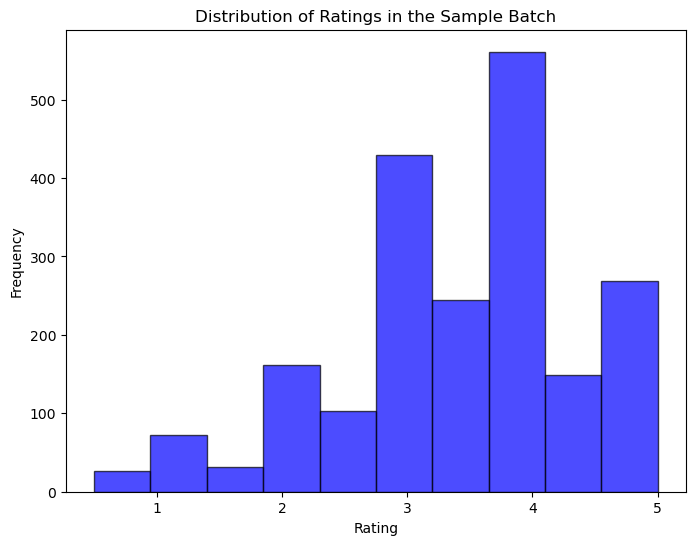

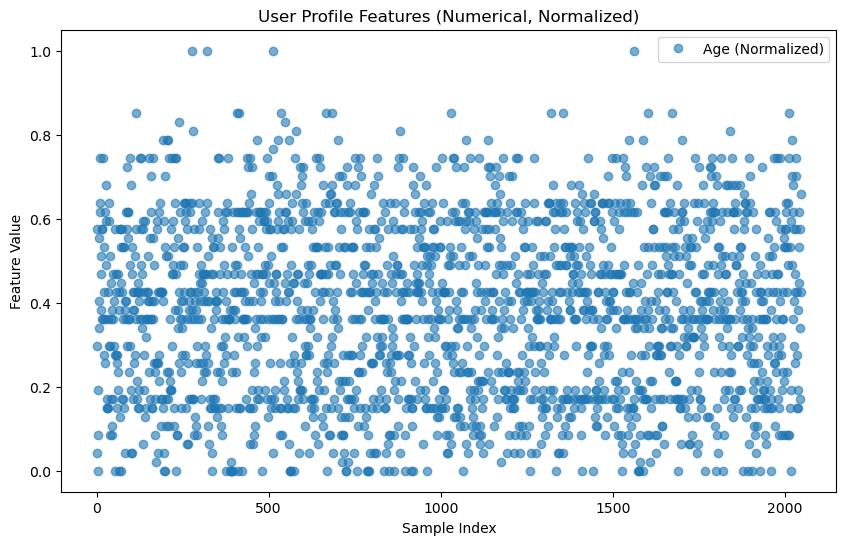

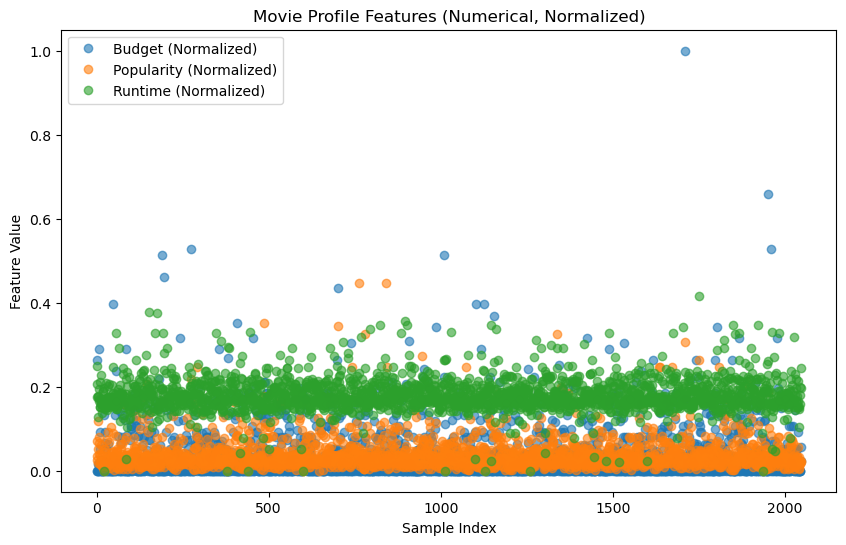

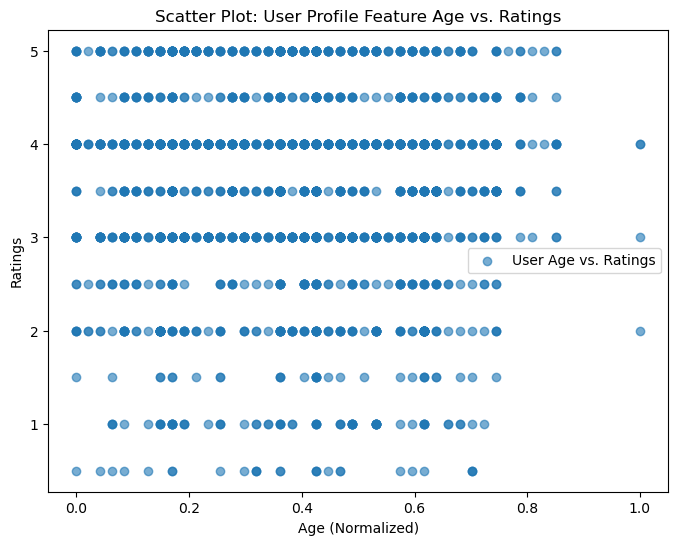

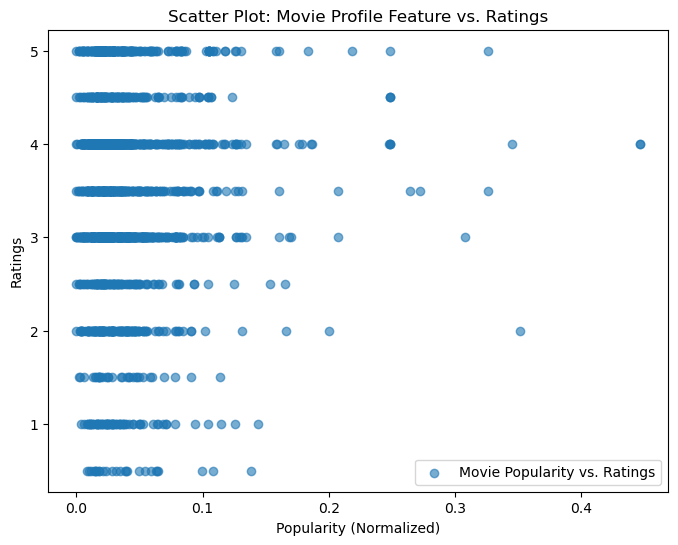

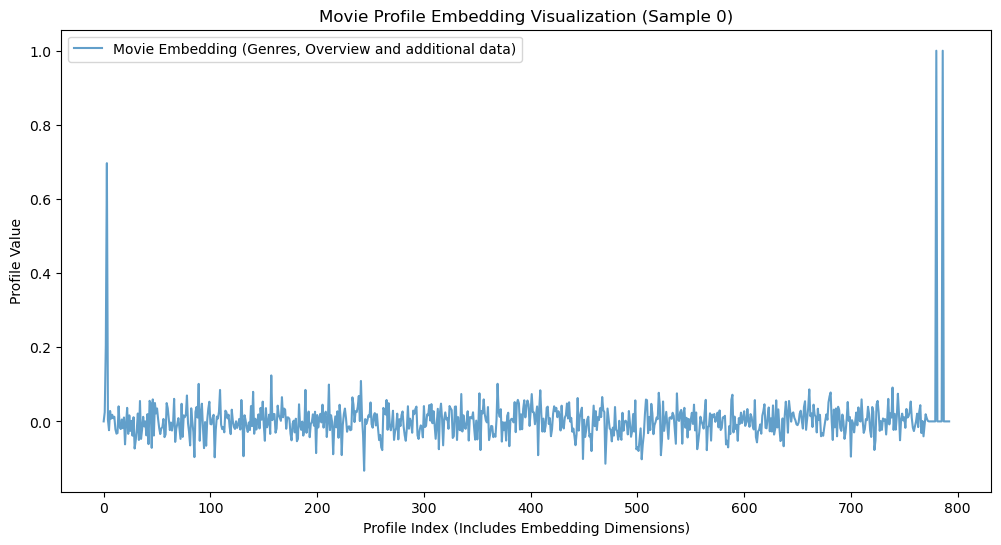

In [11]:
import matplotlib.pyplot as plt

# Helper function to fetch a batch of data from the DataLoader
def get_sample_batch(loader):
    """Fetch a single batch of data from a DataLoader."""
    for batch in loader:
        return batch  # Return the first batch

# Extract a sample batch from the train loader
sample_batch = get_sample_batch(train_loader)

# Unpack the batch: user profiles, movie profiles, and ratings
user_profiles, movie_profiles, ratings, genre_labels = sample_batch

# Convert tensors to numpy for visualization
user_profiles = user_profiles.numpy()
movie_profiles = movie_profiles.numpy()
ratings = ratings.numpy()

# 1. Visualize the distribution of ratings
plt.figure(figsize=(8, 6))
plt.hist(ratings, bins=10, color='blue', alpha=0.7, edgecolor='black')
plt.title("Distribution of Ratings in the Sample Batch")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

# 2. Visualize numerical features from user profiles (the only numerical feature: age)
plt.figure(figsize=(10, 6))
plt.plot(user_profiles[:, 0], 'o', label='Age (Normalized)', alpha=0.6)
plt.title("User Profile Features (Numerical, Normalized)")
plt.xlabel("Sample Index")
plt.ylabel("Feature Value")
plt.legend()
plt.show()

# 3. Visualize numerical features from movie profiles (first 3 numerical features)
plt.figure(figsize=(10, 6))
plt.plot(movie_profiles[:, 0], 'o', label='Budget (Normalized)', alpha=0.6)
plt.plot(movie_profiles[:, 1], 'o', label='Popularity (Normalized)', alpha=0.6)
plt.plot(movie_profiles[:, 2], 'o', label='Runtime (Normalized)', alpha=0.6)
plt.title("Movie Profile Features (Numerical, Normalized)")
plt.xlabel("Sample Index")
plt.ylabel("Feature Value")
plt.legend()
plt.show()

# 4. Visualize the relationship between a user profile feature and ratings
plt.figure(figsize=(8, 6))
plt.scatter(user_profiles[:, 0], ratings, alpha=0.6, label="User Age vs. Ratings")
plt.title("Scatter Plot: User Profile Feature Age vs. Ratings")
plt.xlabel("Age (Normalized)")
plt.ylabel("Ratings")
plt.legend()
plt.show()

# 5. Visualize the relationship between a movie profile feature and ratings
plt.figure(figsize=(8, 6))
plt.scatter(movie_profiles[:, 1], ratings, alpha=0.6, label="Movie Popularity vs. Ratings")
plt.title("Scatter Plot: Movie Profile Feature vs. Ratings")
plt.xlabel("Popularity (Normalized)")
plt.ylabel("Ratings")
plt.legend()
plt.show()

# Inspect embeddings for a random movie profile
plt.figure(figsize=(12, 6))
plt.plot(movie_profiles[0, 0:], label="Movie Embedding (Genres, Overview and additional data)", alpha=0.7)
plt.title("Movie Profile Embedding Visualization (Sample 0)")
plt.xlabel("Profile Index (Includes Embedding Dimensions)")
plt.ylabel("Profile Value")
plt.legend()
plt.show()

You may wonder why the Profile Index (Includes Embedding Dimensions) are larger than the embedding dimension of a single SBERT encoded text. This is because the final embedding vector contains multiple embeddings, the numerical embeddings as textual embeddings too.

**User Profile**
Numerical Features:

Age, genres, sex = 1(age) + number(genres) + 2(sex) dimensions.

Total Dimensions:
1(Numerical) + 18(Genres one-hot) + 2(Categorial) = 21 dimensions.


**Movie Profile**
Numerical Features:

Budget, popularity, runtime, vote_average, vote_count = 5 dimensions.

Genres = 18

***Embeddings***:
Overview embedding = 768 dimensions.

5 (Numerical) + 18 (Genres) + 768 (Overview) = 791 dimensions.

# The recommendation net and training code

The code for the recommendation net can be found in codebase/models.py.

The training code:

In [27]:
from torch.utils.data import DataLoader
import torch.optim as optim
import torch.nn as nn
from torch.utils.tensorboard import SummaryWriter
import os
from datetime import datetime

def initialize_weights(m):
    if isinstance(m, nn.Linear):
        nn.init.xavier_uniform_(m.weight)  # Xavier initialization
        if m.bias is not None:
            nn.init.zeros_(m.bias)

def get_unique_log_dir(base_dir="tensorboard_logs", run_name="baseline_model"):
    """
    Generate a unique log directory based on timestamp.

    Args:
        base_dir (str): Base directory for TensorBoard logs.

    Returns:
        str: Unique log directory path.
    """
    # Generate timestamp
    timestamp = datetime.now().strftime("%Y%m%d-%H%M%S")
    
    # Combine base directory with timestamp
    log_dir = os.path.join(base_dir, f"{run_name}_{timestamp}")
        
    return log_dir

def multitask_loss(criterion, predictions, rating, genre_pred, genre_labels, alpha=0.5):
    mse_loss = criterion(predictions, rating)
    bce_loss = nn.BCEWithLogitsLoss()(genre_pred, genre_labels)
    return alpha * mse_loss + (1 - alpha) * bce_loss

def train(
    model,
    optimizer,
    criterion,
    num_epochs=10,
    patience=3,
    model_path='saved_weights/rec-net/best_model.pth',
    log_dir='tensorboard_logs/rec-net',
    log_every_n_batches=10,  # Log every N batches
    alpha=0.2 # Weight for the genre prediction loss
):
    # TensorBoard writer
    if log_dir is not None:
        writer = SummaryWriter(log_dir=log_dir)

    # Early stopping variables
    best_val_loss = float('inf')
    epochs_without_improvement = 0

    for epoch in range(num_epochs):
        model.train()
        total_loss = 0

        # Training loop
        for batch_idx, (user_profile, movie_profile, rating, genre_labels) in enumerate(train_loader):
            user_profile = user_profile.to(device)
            movie_profile = movie_profile.to(device)
            rating = rating.to(device).view(-1, 1)  # Ensure rating is a column vector
            genre_labels = genre_labels.to(device)  # Multi-hot genre labels

            # Forward pass
            predictions = model(user_profile, movie_profile)
            loss = criterion(predictions, rating)
            #predictions, genre_pred = model(user_profile, movie_profile)
            #loss = multitask_loss(criterion, predictions, rating, genre_pred, genre_labels, alpha)

            # Backward pass and optimization
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            total_loss += loss.item()

            # Log metrics every N batches
            if log_dir is not None and batch_idx % log_every_n_batches == 0:
                with torch.no_grad():
                    # Log genre prediction accuracy
                    genre_accuracy = ((torch.sigmoid(genre_pred) > 0.5) == genre_labels).float().mean().item()
                    writer.add_scalar('Accuracy/Genre (val)', genre_accuracy, epoch)

        # Calculate average training loss
        avg_train_loss = total_loss / len(train_loader)

        # Validation loop
        model.eval()
        val_loss = 0
        with torch.no_grad():
            for user_profile, movie_profile, rating, genre_labels in val_loader:
                user_profile = user_profile.to(device)
                movie_profile = movie_profile.to(device)
                rating = rating.to(device).view(-1, 1)
                genre_labels = genre_labels.to(device)

                predictions = model(user_profile, movie_profile)
                loss = criterion(predictions, rating)
                # predictions, genre_pred = model(user_profile, movie_profile)
                #loss = multitask_loss(criterion, predictions, rating, genre_pred, genre_labels, alpha)
                val_loss += loss.item()
                
                if log_dir is not None:
                    # Log genre prediction accuracy
                    genre_accuracy = ((torch.sigmoid(genre_pred) > 0.5) == genre_labels).float().mean().item()
                    writer.add_scalar('Accuracy/Genre (val)', genre_accuracy, epoch)

        avg_val_loss = val_loss / len(val_loader)

        # Early stopping logic
        if avg_val_loss < best_val_loss:
            best_val_loss = avg_val_loss
            epochs_without_improvement = 0
            torch.save(model.state_dict(), model_path)  # Save the best model
        else:
            epochs_without_improvement += 1
            print(f"Epochs without improvement: {epochs_without_improvement}")

        # Log progress
        print(f"Epoch [{epoch + 1}/{num_epochs}], "
              f"Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}")

        # Log losses to TensorBoard
        if log_dir is not None:
            writer.add_scalar('Loss/Train', avg_train_loss, epoch)
            writer.add_scalar('Loss/Validation', avg_val_loss, epoch)

        # Check for early stopping
        if epochs_without_improvement >= patience:
            print(f"Early stopping triggered after {epoch + 1} epochs!")
            break

    # Load the best model after early stopping
    model.load_state_dict(torch.load(model_path, weights_only=True))
    print("Training complete! Best model loaded.")

    # Close TensorBoard writer
    if log_dir is not None:
        writer.close()

    return avg_val_loss

# Use Optuna to do a hyperparameter search.

In [10]:
# Watch for changes
%load_ext autoreload
%autoreload 2

import optuna
import torch.nn as nn
import torch.optim as optim
from codebase.models import RecommendationNet, RecommendationNetWithFM
from codebase.models_advanced import AdvancedContentRecommendationNet

def objective(trial):
    # Define the parameter search space
    user_dim = user_profiles.shape[1]          # Dimensionality of user profiles
    movie_dim = movie_profiles.shape[1]        # Dimensionality of movie profiles
    
    dense_hidden = trial.suggest_int("dense_hidden", 64, 256, step=32)
    fm_latent_dim = trial.suggest_int("fm_latent_dim", 8, 32, step=8)
    
    # Ensure transformer_d_model is divisible by transformer_nhead
    transformer_nhead = trial.suggest_int("transformer_nhead", 2, 8, step=2)
    transformer_d_model = trial.suggest_int(
        "transformer_d_model", transformer_nhead * 16, transformer_nhead * 32, step=transformer_nhead * 8
    )
    
    transformer_feedforward = trial.suggest_int("transformer_feedforward", 128, 512, step=64)
    transformer_layers = trial.suggest_int("transformer_layers", 1, 4)
    learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)

    # Instantiate the model with sampled hyperparameters
    model = AdvancedContentRecommendationNet(
        user_dim=user_dim,
        movie_dim=movie_dim,
        dense_hidden=dense_hidden,
        fm_latent_dim=fm_latent_dim,
        transformer_d_model=transformer_d_model,
        transformer_nhead=transformer_nhead,
        transformer_feedforward=transformer_feedforward,
        transformer_layers=transformer_layers,
        multitask=True,
        genres_vocab_size=len(genre_vocab)
    )
    
    model = model.to(device)

    # Define optimizer and criterion
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    criterion = nn.MSELoss()

    return train(model, optimizer, criterion, 20, 5, model_path='saved_weights/rec-net/best_model_optuna.pth', log_dir=None, alpha=0.7)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
# Watch for changes
%load_ext autoreload
%autoreload 2

# Create a study
study = optuna.create_study(direction="minimize")  # Minimize validation loss
study.optimize(objective, n_trials=25)  # Run 25 trials

# Print best hyperparameters
print("Best hyperparameters:")
print(study.best_params)
print("Best validation loss:")
print(study.best_value)

[I 2024-12-23 17:12:34,532] A new study created in memory with name: no-name-ab0fe6dc-da87-4164-b112-7317ea8a9d1b


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Model Details:
  User profile dimension: 23
  Movie profile dimension: 793
  Dense hidden size: 256
  FM latent dimension: 8
  Transformer model dimension: 64
  Transformer attention heads: 2
  Transformer feedforward dimension: 512
  Transformer layers: 4
  Multi-task enabled: True
  Genre vocab size: 20

Model Summary:
AdvancedContentRecommendationNet(
  (user_dense): Linear(in_features=23, out_features=256, bias=True)
  (movie_dense): Linear(in_features=793, out_features=256, bias=True)
  (user_gate): GatedMechanism(
    (gate): Linear(in_features=23, out_features=256, bias=True)
    (proj): Linear(in_features=23, out_features=256, bias=True)
  )
  (movie_gate): GatedMechanism(
    (gate): Linear(in_features=793, out_features=256, bias=True)
    (proj): Linear(in_features=793, out_features=256, bias=True)
  )
  (fm_layer): FactorizationMachineLayer()
  (transformer_block): TransformerAttentionBlo

/tmp/ipykernel_2882364/2850334639.py:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)
/home/oliver/anaconda3/envs/pytorch_env/lib/python3.9/site-packages/torch/nn/modules/transformer.py:379: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


Epoch [1/20], Train Loss: 1.4025, Val Loss: 0.8610
Epoch [2/20], Train Loss: 0.8933, Val Loss: 0.8223
Epoch [3/20], Train Loss: 0.8679, Val Loss: 0.8189
Epoch [4/20], Train Loss: 0.8584, Val Loss: 0.8179
Epochs without improvement: 1
Epoch [5/20], Train Loss: 0.8494, Val Loss: 0.8196
Epochs without improvement: 2
Epoch [6/20], Train Loss: 0.8438, Val Loss: 0.8255
Epochs without improvement: 3
Epoch [7/20], Train Loss: 0.8411, Val Loss: 0.8237
Epoch [8/20], Train Loss: 0.8350, Val Loss: 0.8140
Epochs without improvement: 1
Epoch [9/20], Train Loss: 0.8312, Val Loss: 0.8155
Epochs without improvement: 2
Epoch [10/20], Train Loss: 0.8311, Val Loss: 0.8268
Epoch [11/20], Train Loss: 0.8264, Val Loss: 0.8113
Epochs without improvement: 1
Epoch [12/20], Train Loss: 0.8199, Val Loss: 0.8133
Epochs without improvement: 2
Epoch [13/20], Train Loss: 0.8182, Val Loss: 0.8125
Epoch [14/20], Train Loss: 0.8148, Val Loss: 0.8063
Epochs without improvement: 1
Epoch [15/20], Train Loss: 0.8065, Val Lo

[I 2024-12-23 17:15:34,717] Trial 0 finished with value: 0.8041400164365768 and parameters: {'dense_hidden': 256, 'fm_latent_dim': 8, 'transformer_nhead': 2, 'transformer_d_model': 64, 'transformer_feedforward': 512, 'transformer_layers': 4, 'learning_rate': 0.0018969974989105495}. Best is trial 0 with value: 0.8041400164365768.


Epoch [20/20], Train Loss: 0.7953, Val Loss: 0.8041
Training complete! Best model loaded.
Model Details:
  User profile dimension: 23
  Movie profile dimension: 793
  Dense hidden size: 256
  FM latent dimension: 8
  Transformer model dimension: 144
  Transformer attention heads: 6
  Transformer feedforward dimension: 512
  Transformer layers: 4
  Multi-task enabled: True
  Genre vocab size: 20

Model Summary:
AdvancedContentRecommendationNet(
  (user_dense): Linear(in_features=23, out_features=256, bias=True)
  (movie_dense): Linear(in_features=793, out_features=256, bias=True)
  (user_gate): GatedMechanism(
    (gate): Linear(in_features=23, out_features=256, bias=True)
    (proj): Linear(in_features=23, out_features=256, bias=True)
  )
  (movie_gate): GatedMechanism(
    (gate): Linear(in_features=793, out_features=256, bias=True)
    (proj): Linear(in_features=793, out_features=256, bias=True)
  )
  (fm_layer): FactorizationMachineLayer()
  (transformer_block): TransformerAttention

[I 2024-12-23 17:18:48,574] Trial 1 finished with value: 0.7686871737241745 and parameters: {'dense_hidden': 256, 'fm_latent_dim': 8, 'transformer_nhead': 6, 'transformer_d_model': 144, 'transformer_feedforward': 512, 'transformer_layers': 4, 'learning_rate': 0.0019798014263855187}. Best is trial 1 with value: 0.7686871737241745.


Epoch [20/20], Train Loss: 0.7852, Val Loss: 0.7687
Training complete! Best model loaded.
Model Details:
  User profile dimension: 23
  Movie profile dimension: 793
  Dense hidden size: 160
  FM latent dimension: 32
  Transformer model dimension: 256
  Transformer attention heads: 8
  Transformer feedforward dimension: 384
  Transformer layers: 4
  Multi-task enabled: True
  Genre vocab size: 20

Model Summary:
AdvancedContentRecommendationNet(
  (user_dense): Linear(in_features=23, out_features=160, bias=True)
  (movie_dense): Linear(in_features=793, out_features=160, bias=True)
  (user_gate): GatedMechanism(
    (gate): Linear(in_features=23, out_features=160, bias=True)
    (proj): Linear(in_features=23, out_features=160, bias=True)
  )
  (movie_gate): GatedMechanism(
    (gate): Linear(in_features=793, out_features=160, bias=True)
    (proj): Linear(in_features=793, out_features=160, bias=True)
  )
  (fm_layer): FactorizationMachineLayer()
  (transformer_block): TransformerAttentio

[I 2024-12-23 17:22:04,206] Trial 2 finished with value: 0.7936320006847382 and parameters: {'dense_hidden': 160, 'fm_latent_dim': 32, 'transformer_nhead': 8, 'transformer_d_model': 256, 'transformer_feedforward': 384, 'transformer_layers': 4, 'learning_rate': 0.00010253007167404502}. Best is trial 1 with value: 0.7686871737241745.


Epoch [20/20], Train Loss: 0.6290, Val Loss: 0.7936
Training complete! Best model loaded.
Model Details:
  User profile dimension: 23
  Movie profile dimension: 793
  Dense hidden size: 64
  FM latent dimension: 8
  Transformer model dimension: 192
  Transformer attention heads: 8
  Transformer feedforward dimension: 256
  Transformer layers: 4
  Multi-task enabled: True
  Genre vocab size: 20

Model Summary:
AdvancedContentRecommendationNet(
  (user_dense): Linear(in_features=23, out_features=64, bias=True)
  (movie_dense): Linear(in_features=793, out_features=64, bias=True)
  (user_gate): GatedMechanism(
    (gate): Linear(in_features=23, out_features=64, bias=True)
    (proj): Linear(in_features=23, out_features=64, bias=True)
  )
  (movie_gate): GatedMechanism(
    (gate): Linear(in_features=793, out_features=64, bias=True)
    (proj): Linear(in_features=793, out_features=64, bias=True)
  )
  (fm_layer): FactorizationMachineLayer()
  (transformer_block): TransformerAttentionBlock(


[I 2024-12-23 17:24:15,297] Trial 3 finished with value: 0.8162006437778473 and parameters: {'dense_hidden': 64, 'fm_latent_dim': 8, 'transformer_nhead': 8, 'transformer_d_model': 192, 'transformer_feedforward': 256, 'transformer_layers': 4, 'learning_rate': 0.00026485716435303196}. Best is trial 1 with value: 0.7686871737241745.


Epochs without improvement: 5
Epoch [13/20], Train Loss: 0.7114, Val Loss: 0.8162
Early stopping triggered after 13 epochs!
Training complete! Best model loaded.
Model Details:
  User profile dimension: 23
  Movie profile dimension: 793
  Dense hidden size: 192
  FM latent dimension: 32
  Transformer model dimension: 64
  Transformer attention heads: 4
  Transformer feedforward dimension: 512
  Transformer layers: 4
  Multi-task enabled: True
  Genre vocab size: 20

Model Summary:
AdvancedContentRecommendationNet(
  (user_dense): Linear(in_features=23, out_features=192, bias=True)
  (movie_dense): Linear(in_features=793, out_features=192, bias=True)
  (user_gate): GatedMechanism(
    (gate): Linear(in_features=23, out_features=192, bias=True)
    (proj): Linear(in_features=23, out_features=192, bias=True)
  )
  (movie_gate): GatedMechanism(
    (gate): Linear(in_features=793, out_features=192, bias=True)
    (proj): Linear(in_features=793, out_features=192, bias=True)
  )
  (fm_layer):

[I 2024-12-23 17:26:28,142] Trial 4 finished with value: 0.804525263607502 and parameters: {'dense_hidden': 192, 'fm_latent_dim': 32, 'transformer_nhead': 4, 'transformer_d_model': 64, 'transformer_feedforward': 512, 'transformer_layers': 4, 'learning_rate': 0.0008498432055430588}. Best is trial 1 with value: 0.7686871737241745.


Epochs without improvement: 5
Epoch [14/20], Train Loss: 0.6316, Val Loss: 0.8045
Early stopping triggered after 14 epochs!
Training complete! Best model loaded.
Model Details:
  User profile dimension: 23
  Movie profile dimension: 793
  Dense hidden size: 128
  FM latent dimension: 24
  Transformer model dimension: 64
  Transformer attention heads: 4
  Transformer feedforward dimension: 192
  Transformer layers: 4
  Multi-task enabled: True
  Genre vocab size: 20

Model Summary:
AdvancedContentRecommendationNet(
  (user_dense): Linear(in_features=23, out_features=128, bias=True)
  (movie_dense): Linear(in_features=793, out_features=128, bias=True)
  (user_gate): GatedMechanism(
    (gate): Linear(in_features=23, out_features=128, bias=True)
    (proj): Linear(in_features=23, out_features=128, bias=True)
  )
  (movie_gate): GatedMechanism(
    (gate): Linear(in_features=793, out_features=128, bias=True)
    (proj): Linear(in_features=793, out_features=128, bias=True)
  )
  (fm_layer):

[I 2024-12-23 17:28:33,527] Trial 5 finished with value: 0.812257930636406 and parameters: {'dense_hidden': 128, 'fm_latent_dim': 24, 'transformer_nhead': 4, 'transformer_d_model': 64, 'transformer_feedforward': 192, 'transformer_layers': 4, 'learning_rate': 0.00030984063880566275}. Best is trial 1 with value: 0.7686871737241745.


Epochs without improvement: 5
Epoch [13/20], Train Loss: 0.6979, Val Loss: 0.8123
Early stopping triggered after 13 epochs!
Training complete! Best model loaded.
Model Details:
  User profile dimension: 23
  Movie profile dimension: 793
  Dense hidden size: 192
  FM latent dimension: 32
  Transformer model dimension: 256
  Transformer attention heads: 8
  Transformer feedforward dimension: 448
  Transformer layers: 2
  Multi-task enabled: True
  Genre vocab size: 20

Model Summary:
AdvancedContentRecommendationNet(
  (user_dense): Linear(in_features=23, out_features=192, bias=True)
  (movie_dense): Linear(in_features=793, out_features=192, bias=True)
  (user_gate): GatedMechanism(
    (gate): Linear(in_features=23, out_features=192, bias=True)
    (proj): Linear(in_features=23, out_features=192, bias=True)
  )
  (movie_gate): GatedMechanism(
    (gate): Linear(in_features=793, out_features=192, bias=True)
    (proj): Linear(in_features=793, out_features=192, bias=True)
  )
  (fm_layer)

[I 2024-12-23 17:29:50,636] Trial 6 finished with value: 0.8173568844795227 and parameters: {'dense_hidden': 192, 'fm_latent_dim': 32, 'transformer_nhead': 8, 'transformer_d_model': 256, 'transformer_feedforward': 448, 'transformer_layers': 2, 'learning_rate': 0.00036728729220887276}. Best is trial 1 with value: 0.7686871737241745.


Epochs without improvement: 5
Epoch [8/20], Train Loss: 0.7000, Val Loss: 0.8174
Early stopping triggered after 8 epochs!
Training complete! Best model loaded.
Model Details:
  User profile dimension: 23
  Movie profile dimension: 793
  Dense hidden size: 192
  FM latent dimension: 8
  Transformer model dimension: 64
  Transformer attention heads: 2
  Transformer feedforward dimension: 384
  Transformer layers: 4
  Multi-task enabled: True
  Genre vocab size: 20

Model Summary:
AdvancedContentRecommendationNet(
  (user_dense): Linear(in_features=23, out_features=192, bias=True)
  (movie_dense): Linear(in_features=793, out_features=192, bias=True)
  (user_gate): GatedMechanism(
    (gate): Linear(in_features=23, out_features=192, bias=True)
    (proj): Linear(in_features=23, out_features=192, bias=True)
  )
  (movie_gate): GatedMechanism(
    (gate): Linear(in_features=793, out_features=192, bias=True)
    (proj): Linear(in_features=793, out_features=192, bias=True)
  )
  (fm_layer): Fa

[I 2024-12-23 17:32:55,557] Trial 7 finished with value: 0.8293182998895645 and parameters: {'dense_hidden': 192, 'fm_latent_dim': 8, 'transformer_nhead': 2, 'transformer_d_model': 64, 'transformer_feedforward': 384, 'transformer_layers': 4, 'learning_rate': 0.00013512211091651}. Best is trial 1 with value: 0.7686871737241745.


Epochs without improvement: 1
Epoch [20/20], Train Loss: 0.6799, Val Loss: 0.8293
Training complete! Best model loaded.
Model Details:
  User profile dimension: 23
  Movie profile dimension: 793
  Dense hidden size: 96
  FM latent dimension: 32
  Transformer model dimension: 48
  Transformer attention heads: 2
  Transformer feedforward dimension: 256
  Transformer layers: 1
  Multi-task enabled: True
  Genre vocab size: 20

Model Summary:
AdvancedContentRecommendationNet(
  (user_dense): Linear(in_features=23, out_features=96, bias=True)
  (movie_dense): Linear(in_features=793, out_features=96, bias=True)
  (user_gate): GatedMechanism(
    (gate): Linear(in_features=23, out_features=96, bias=True)
    (proj): Linear(in_features=23, out_features=96, bias=True)
  )
  (movie_gate): GatedMechanism(
    (gate): Linear(in_features=793, out_features=96, bias=True)
    (proj): Linear(in_features=793, out_features=96, bias=True)
  )
  (fm_layer): FactorizationMachineLayer()
  (transformer_block

[I 2024-12-23 17:35:55,990] Trial 8 finished with value: 0.8193982616066933 and parameters: {'dense_hidden': 96, 'fm_latent_dim': 32, 'transformer_nhead': 2, 'transformer_d_model': 48, 'transformer_feedforward': 256, 'transformer_layers': 1, 'learning_rate': 0.0003484614589017689}. Best is trial 1 with value: 0.7686871737241745.


Epochs without improvement: 3
Epoch [20/20], Train Loss: 0.6505, Val Loss: 0.8194
Training complete! Best model loaded.
Model Details:
  User profile dimension: 23
  Movie profile dimension: 793
  Dense hidden size: 256
  FM latent dimension: 32
  Transformer model dimension: 192
  Transformer attention heads: 6
  Transformer feedforward dimension: 512
  Transformer layers: 4
  Multi-task enabled: True
  Genre vocab size: 20

Model Summary:
AdvancedContentRecommendationNet(
  (user_dense): Linear(in_features=23, out_features=256, bias=True)
  (movie_dense): Linear(in_features=793, out_features=256, bias=True)
  (user_gate): GatedMechanism(
    (gate): Linear(in_features=23, out_features=256, bias=True)
    (proj): Linear(in_features=23, out_features=256, bias=True)
  )
  (movie_gate): GatedMechanism(
    (gate): Linear(in_features=793, out_features=256, bias=True)
    (proj): Linear(in_features=793, out_features=256, bias=True)
  )
  (fm_layer): FactorizationMachineLayer()
  (transform

[I 2024-12-23 17:37:43,871] Trial 9 finished with value: 0.8389742746949196 and parameters: {'dense_hidden': 256, 'fm_latent_dim': 32, 'transformer_nhead': 6, 'transformer_d_model': 192, 'transformer_feedforward': 512, 'transformer_layers': 4, 'learning_rate': 0.00013468123480694027}. Best is trial 1 with value: 0.7686871737241745.


Epochs without improvement: 5
Epoch [11/20], Train Loss: 0.6966, Val Loss: 0.8390
Early stopping triggered after 11 epochs!
Training complete! Best model loaded.
Model Details:
  User profile dimension: 23
  Movie profile dimension: 793
  Dense hidden size: 256
  FM latent dimension: 16
  Transformer model dimension: 144
  Transformer attention heads: 6
  Transformer feedforward dimension: 128
  Transformer layers: 3
  Multi-task enabled: True
  Genre vocab size: 20

Model Summary:
AdvancedContentRecommendationNet(
  (user_dense): Linear(in_features=23, out_features=256, bias=True)
  (movie_dense): Linear(in_features=793, out_features=256, bias=True)
  (user_gate): GatedMechanism(
    (gate): Linear(in_features=23, out_features=256, bias=True)
    (proj): Linear(in_features=23, out_features=256, bias=True)
  )
  (movie_gate): GatedMechanism(
    (gate): Linear(in_features=793, out_features=256, bias=True)
    (proj): Linear(in_features=793, out_features=256, bias=True)
  )
  (fm_layer)

[I 2024-12-23 17:40:35,069] Trial 10 finished with value: 0.7748770788311958 and parameters: {'dense_hidden': 256, 'fm_latent_dim': 16, 'transformer_nhead': 6, 'transformer_d_model': 144, 'transformer_feedforward': 128, 'transformer_layers': 3, 'learning_rate': 0.00734834430723277}. Best is trial 1 with value: 0.7686871737241745.


Epochs without improvement: 5
Epoch [18/20], Train Loss: 0.7379, Val Loss: 0.7749
Early stopping triggered after 18 epochs!
Training complete! Best model loaded.
Model Details:
  User profile dimension: 23
  Movie profile dimension: 793
  Dense hidden size: 256
  FM latent dimension: 16
  Transformer model dimension: 144
  Transformer attention heads: 6
  Transformer feedforward dimension: 128
  Transformer layers: 3
  Multi-task enabled: True
  Genre vocab size: 20

Model Summary:
AdvancedContentRecommendationNet(
  (user_dense): Linear(in_features=23, out_features=256, bias=True)
  (movie_dense): Linear(in_features=793, out_features=256, bias=True)
  (user_gate): GatedMechanism(
    (gate): Linear(in_features=23, out_features=256, bias=True)
    (proj): Linear(in_features=23, out_features=256, bias=True)
  )
  (movie_gate): GatedMechanism(
    (gate): Linear(in_features=793, out_features=256, bias=True)
    (proj): Linear(in_features=793, out_features=256, bias=True)
  )
  (fm_layer)

[I 2024-12-23 17:43:44,687] Trial 11 finished with value: 0.7928708344697952 and parameters: {'dense_hidden': 256, 'fm_latent_dim': 16, 'transformer_nhead': 6, 'transformer_d_model': 144, 'transformer_feedforward': 128, 'transformer_layers': 3, 'learning_rate': 0.009767071108228312}. Best is trial 1 with value: 0.7686871737241745.


Epochs without improvement: 1
Epoch [20/20], Train Loss: 0.7134, Val Loss: 0.7929
Training complete! Best model loaded.
Model Details:
  User profile dimension: 23
  Movie profile dimension: 793
  Dense hidden size: 224
  FM latent dimension: 16
  Transformer model dimension: 144
  Transformer attention heads: 6
  Transformer feedforward dimension: 128
  Transformer layers: 3
  Multi-task enabled: True
  Genre vocab size: 20

Model Summary:
AdvancedContentRecommendationNet(
  (user_dense): Linear(in_features=23, out_features=224, bias=True)
  (movie_dense): Linear(in_features=793, out_features=224, bias=True)
  (user_gate): GatedMechanism(
    (gate): Linear(in_features=23, out_features=224, bias=True)
    (proj): Linear(in_features=23, out_features=224, bias=True)
  )
  (movie_gate): GatedMechanism(
    (gate): Linear(in_features=793, out_features=224, bias=True)
    (proj): Linear(in_features=793, out_features=224, bias=True)
  )
  (fm_layer): FactorizationMachineLayer()
  (transform

[I 2024-12-23 17:46:54,861] Trial 12 finished with value: 0.7408345118165016 and parameters: {'dense_hidden': 224, 'fm_latent_dim': 16, 'transformer_nhead': 6, 'transformer_d_model': 144, 'transformer_feedforward': 128, 'transformer_layers': 3, 'learning_rate': 0.006253920866637675}. Best is trial 12 with value: 0.7408345118165016.


Epochs without improvement: 1
Epoch [20/20], Train Loss: 0.7062, Val Loss: 0.7408
Training complete! Best model loaded.
Model Details:
  User profile dimension: 23
  Movie profile dimension: 793
  Dense hidden size: 224
  FM latent dimension: 16
  Transformer model dimension: 144
  Transformer attention heads: 6
  Transformer feedforward dimension: 320
  Transformer layers: 3
  Multi-task enabled: True
  Genre vocab size: 20

Model Summary:
AdvancedContentRecommendationNet(
  (user_dense): Linear(in_features=23, out_features=224, bias=True)
  (movie_dense): Linear(in_features=793, out_features=224, bias=True)
  (user_gate): GatedMechanism(
    (gate): Linear(in_features=23, out_features=224, bias=True)
    (proj): Linear(in_features=23, out_features=224, bias=True)
  )
  (movie_gate): GatedMechanism(
    (gate): Linear(in_features=793, out_features=224, bias=True)
    (proj): Linear(in_features=793, out_features=224, bias=True)
  )
  (fm_layer): FactorizationMachineLayer()
  (transform

[I 2024-12-23 17:50:06,421] Trial 13 finished with value: 0.7478329986333847 and parameters: {'dense_hidden': 224, 'fm_latent_dim': 16, 'transformer_nhead': 6, 'transformer_d_model': 144, 'transformer_feedforward': 320, 'transformer_layers': 3, 'learning_rate': 0.0034762801056578423}. Best is trial 12 with value: 0.7408345118165016.


Epochs without improvement: 4
Epoch [20/20], Train Loss: 0.7153, Val Loss: 0.7478
Training complete! Best model loaded.
Model Details:
  User profile dimension: 23
  Movie profile dimension: 793
  Dense hidden size: 224
  FM latent dimension: 16
  Transformer model dimension: 96
  Transformer attention heads: 4
  Transformer feedforward dimension: 320
  Transformer layers: 2
  Multi-task enabled: True
  Genre vocab size: 20

Model Summary:
AdvancedContentRecommendationNet(
  (user_dense): Linear(in_features=23, out_features=224, bias=True)
  (movie_dense): Linear(in_features=793, out_features=224, bias=True)
  (user_gate): GatedMechanism(
    (gate): Linear(in_features=23, out_features=224, bias=True)
    (proj): Linear(in_features=23, out_features=224, bias=True)
  )
  (movie_gate): GatedMechanism(
    (gate): Linear(in_features=793, out_features=224, bias=True)
    (proj): Linear(in_features=793, out_features=224, bias=True)
  )
  (fm_layer): FactorizationMachineLayer()
  (transforme

[I 2024-12-23 17:53:14,905] Trial 14 finished with value: 0.7755116447806358 and parameters: {'dense_hidden': 224, 'fm_latent_dim': 16, 'transformer_nhead': 4, 'transformer_d_model': 96, 'transformer_feedforward': 320, 'transformer_layers': 2, 'learning_rate': 0.004304769761813423}. Best is trial 12 with value: 0.7408345118165016.


Epochs without improvement: 4
Epoch [20/20], Train Loss: 0.6970, Val Loss: 0.7755
Training complete! Best model loaded.
Model Details:
  User profile dimension: 23
  Movie profile dimension: 793
  Dense hidden size: 224
  FM latent dimension: 24
  Transformer model dimension: 144
  Transformer attention heads: 6
  Transformer feedforward dimension: 192
  Transformer layers: 3
  Multi-task enabled: True
  Genre vocab size: 20

Model Summary:
AdvancedContentRecommendationNet(
  (user_dense): Linear(in_features=23, out_features=224, bias=True)
  (movie_dense): Linear(in_features=793, out_features=224, bias=True)
  (user_gate): GatedMechanism(
    (gate): Linear(in_features=23, out_features=224, bias=True)
    (proj): Linear(in_features=23, out_features=224, bias=True)
  )
  (movie_gate): GatedMechanism(
    (gate): Linear(in_features=793, out_features=224, bias=True)
    (proj): Linear(in_features=793, out_features=224, bias=True)
  )
  (fm_layer): FactorizationMachineLayer()
  (transform

[I 2024-12-23 17:56:27,709] Trial 15 finished with value: 0.7515730336308479 and parameters: {'dense_hidden': 224, 'fm_latent_dim': 24, 'transformer_nhead': 6, 'transformer_d_model': 144, 'transformer_feedforward': 192, 'transformer_layers': 3, 'learning_rate': 0.0036280851686533518}. Best is trial 12 with value: 0.7408345118165016.


Epochs without improvement: 5
Epoch [20/20], Train Loss: 0.6845, Val Loss: 0.7516
Early stopping triggered after 20 epochs!
Training complete! Best model loaded.
Model Details:
  User profile dimension: 23
  Movie profile dimension: 793
  Dense hidden size: 160
  FM latent dimension: 16
  Transformer model dimension: 96
  Transformer attention heads: 4
  Transformer feedforward dimension: 320
  Transformer layers: 2
  Multi-task enabled: True
  Genre vocab size: 20

Model Summary:
AdvancedContentRecommendationNet(
  (user_dense): Linear(in_features=23, out_features=160, bias=True)
  (movie_dense): Linear(in_features=793, out_features=160, bias=True)
  (user_gate): GatedMechanism(
    (gate): Linear(in_features=23, out_features=160, bias=True)
    (proj): Linear(in_features=23, out_features=160, bias=True)
  )
  (movie_gate): GatedMechanism(
    (gate): Linear(in_features=793, out_features=160, bias=True)
    (proj): Linear(in_features=793, out_features=160, bias=True)
  )
  (fm_layer):

[I 2024-12-23 17:59:32,184] Trial 16 finished with value: 0.7746984735131264 and parameters: {'dense_hidden': 160, 'fm_latent_dim': 16, 'transformer_nhead': 4, 'transformer_d_model': 96, 'transformer_feedforward': 320, 'transformer_layers': 2, 'learning_rate': 0.004961896404751242}. Best is trial 12 with value: 0.7408345118165016.


Epochs without improvement: 2
Epoch [20/20], Train Loss: 0.7093, Val Loss: 0.7747
Training complete! Best model loaded.
Model Details:
  User profile dimension: 23
  Movie profile dimension: 793
  Dense hidden size: 224
  FM latent dimension: 24
  Transformer model dimension: 192
  Transformer attention heads: 8
  Transformer feedforward dimension: 192
  Transformer layers: 3
  Multi-task enabled: True
  Genre vocab size: 20

Model Summary:
AdvancedContentRecommendationNet(
  (user_dense): Linear(in_features=23, out_features=224, bias=True)
  (movie_dense): Linear(in_features=793, out_features=224, bias=True)
  (user_gate): GatedMechanism(
    (gate): Linear(in_features=23, out_features=224, bias=True)
    (proj): Linear(in_features=23, out_features=224, bias=True)
  )
  (movie_gate): GatedMechanism(
    (gate): Linear(in_features=793, out_features=224, bias=True)
    (proj): Linear(in_features=793, out_features=224, bias=True)
  )
  (fm_layer): FactorizationMachineLayer()
  (transform

[I 2024-12-23 18:02:07,476] Trial 17 finished with value: 0.7602595612406731 and parameters: {'dense_hidden': 224, 'fm_latent_dim': 24, 'transformer_nhead': 8, 'transformer_d_model': 192, 'transformer_feedforward': 192, 'transformer_layers': 3, 'learning_rate': 0.0025138611299444042}. Best is trial 12 with value: 0.7408345118165016.


Epochs without improvement: 5
Epoch [16/20], Train Loss: 0.7133, Val Loss: 0.7603
Early stopping triggered after 16 epochs!
Training complete! Best model loaded.
Model Details:
  User profile dimension: 23
  Movie profile dimension: 793
  Dense hidden size: 160
  FM latent dimension: 16
  Transformer model dimension: 144
  Transformer attention heads: 6
  Transformer feedforward dimension: 256
  Transformer layers: 1
  Multi-task enabled: True
  Genre vocab size: 20

Model Summary:
AdvancedContentRecommendationNet(
  (user_dense): Linear(in_features=23, out_features=160, bias=True)
  (movie_dense): Linear(in_features=793, out_features=160, bias=True)
  (user_gate): GatedMechanism(
    (gate): Linear(in_features=23, out_features=160, bias=True)
    (proj): Linear(in_features=23, out_features=160, bias=True)
  )
  (movie_gate): GatedMechanism(
    (gate): Linear(in_features=793, out_features=160, bias=True)
    (proj): Linear(in_features=793, out_features=160, bias=True)
  )
  (fm_layer)

[I 2024-12-23 18:05:10,138] Trial 18 finished with value: 0.7949176579713821 and parameters: {'dense_hidden': 160, 'fm_latent_dim': 16, 'transformer_nhead': 6, 'transformer_d_model': 144, 'transformer_feedforward': 256, 'transformer_layers': 1, 'learning_rate': 0.0012714584411289969}. Best is trial 12 with value: 0.7408345118165016.


Epochs without improvement: 1
Epoch [20/20], Train Loss: 0.5282, Val Loss: 0.7949
Training complete! Best model loaded.
Model Details:
  User profile dimension: 23
  Movie profile dimension: 793
  Dense hidden size: 224
  FM latent dimension: 24
  Transformer model dimension: 96
  Transformer attention heads: 4
  Transformer feedforward dimension: 384
  Transformer layers: 3
  Multi-task enabled: True
  Genre vocab size: 20

Model Summary:
AdvancedContentRecommendationNet(
  (user_dense): Linear(in_features=23, out_features=224, bias=True)
  (movie_dense): Linear(in_features=793, out_features=224, bias=True)
  (user_gate): GatedMechanism(
    (gate): Linear(in_features=23, out_features=224, bias=True)
    (proj): Linear(in_features=23, out_features=224, bias=True)
  )
  (movie_gate): GatedMechanism(
    (gate): Linear(in_features=793, out_features=224, bias=True)
    (proj): Linear(in_features=793, out_features=224, bias=True)
  )
  (fm_layer): FactorizationMachineLayer()
  (transforme

[I 2024-12-23 18:08:17,346] Trial 19 finished with value: 0.7546474114060402 and parameters: {'dense_hidden': 224, 'fm_latent_dim': 24, 'transformer_nhead': 4, 'transformer_d_model': 96, 'transformer_feedforward': 384, 'transformer_layers': 3, 'learning_rate': 0.007042383077972958}. Best is trial 12 with value: 0.7408345118165016.


Epoch [20/20], Train Loss: 0.6657, Val Loss: 0.7546
Training complete! Best model loaded.
Model Details:
  User profile dimension: 23
  Movie profile dimension: 793
  Dense hidden size: 192
  FM latent dimension: 16
  Transformer model dimension: 192
  Transformer attention heads: 8
  Transformer feedforward dimension: 128
  Transformer layers: 2
  Multi-task enabled: True
  Genre vocab size: 20

Model Summary:
AdvancedContentRecommendationNet(
  (user_dense): Linear(in_features=23, out_features=192, bias=True)
  (movie_dense): Linear(in_features=793, out_features=192, bias=True)
  (user_gate): GatedMechanism(
    (gate): Linear(in_features=23, out_features=192, bias=True)
    (proj): Linear(in_features=23, out_features=192, bias=True)
  )
  (movie_gate): GatedMechanism(
    (gate): Linear(in_features=793, out_features=192, bias=True)
    (proj): Linear(in_features=793, out_features=192, bias=True)
  )
  (fm_layer): FactorizationMachineLayer()
  (transformer_block): TransformerAttentio

[I 2024-12-23 18:11:26,547] Trial 20 finished with value: 0.7683532238006592 and parameters: {'dense_hidden': 192, 'fm_latent_dim': 16, 'transformer_nhead': 8, 'transformer_d_model': 192, 'transformer_feedforward': 128, 'transformer_layers': 2, 'learning_rate': 0.0008245863770600407}. Best is trial 12 with value: 0.7408345118165016.


Epochs without improvement: 5
Epoch [20/20], Train Loss: 0.5006, Val Loss: 0.7684
Early stopping triggered after 20 epochs!
Training complete! Best model loaded.
Model Details:
  User profile dimension: 23
  Movie profile dimension: 793
  Dense hidden size: 224
  FM latent dimension: 24
  Transformer model dimension: 144
  Transformer attention heads: 6
  Transformer feedforward dimension: 192
  Transformer layers: 3
  Multi-task enabled: True
  Genre vocab size: 20

Model Summary:
AdvancedContentRecommendationNet(
  (user_dense): Linear(in_features=23, out_features=224, bias=True)
  (movie_dense): Linear(in_features=793, out_features=224, bias=True)
  (user_gate): GatedMechanism(
    (gate): Linear(in_features=23, out_features=224, bias=True)
    (proj): Linear(in_features=23, out_features=224, bias=True)
  )
  (movie_gate): GatedMechanism(
    (gate): Linear(in_features=793, out_features=224, bias=True)
    (proj): Linear(in_features=793, out_features=224, bias=True)
  )
  (fm_layer)

[I 2024-12-23 18:13:40,659] Trial 21 finished with value: 0.770262099802494 and parameters: {'dense_hidden': 224, 'fm_latent_dim': 24, 'transformer_nhead': 6, 'transformer_d_model': 144, 'transformer_feedforward': 192, 'transformer_layers': 3, 'learning_rate': 0.0035252293456440056}. Best is trial 12 with value: 0.7408345118165016.


Epochs without improvement: 5
Epoch [14/20], Train Loss: 0.7250, Val Loss: 0.7703
Early stopping triggered after 14 epochs!
Training complete! Best model loaded.
Model Details:
  User profile dimension: 23
  Movie profile dimension: 793
  Dense hidden size: 224
  FM latent dimension: 24
  Transformer model dimension: 144
  Transformer attention heads: 6
  Transformer feedforward dimension: 192
  Transformer layers: 3
  Multi-task enabled: True
  Genre vocab size: 20

Model Summary:
AdvancedContentRecommendationNet(
  (user_dense): Linear(in_features=23, out_features=224, bias=True)
  (movie_dense): Linear(in_features=793, out_features=224, bias=True)
  (user_gate): GatedMechanism(
    (gate): Linear(in_features=23, out_features=224, bias=True)
    (proj): Linear(in_features=23, out_features=224, bias=True)
  )
  (movie_gate): GatedMechanism(
    (gate): Linear(in_features=793, out_features=224, bias=True)
    (proj): Linear(in_features=793, out_features=224, bias=True)
  )
  (fm_layer)

[I 2024-12-23 18:16:20,047] Trial 22 finished with value: 0.7766354754567146 and parameters: {'dense_hidden': 224, 'fm_latent_dim': 24, 'transformer_nhead': 6, 'transformer_d_model': 144, 'transformer_feedforward': 192, 'transformer_layers': 3, 'learning_rate': 0.0029339702084175113}. Best is trial 12 with value: 0.7408345118165016.


Epochs without improvement: 5
Epoch [17/20], Train Loss: 0.7098, Val Loss: 0.7766
Early stopping triggered after 17 epochs!
Training complete! Best model loaded.
Model Details:
  User profile dimension: 23
  Movie profile dimension: 793
  Dense hidden size: 192
  FM latent dimension: 16
  Transformer model dimension: 144
  Transformer attention heads: 6
  Transformer feedforward dimension: 128
  Transformer layers: 3
  Multi-task enabled: True
  Genre vocab size: 20

Model Summary:
AdvancedContentRecommendationNet(
  (user_dense): Linear(in_features=23, out_features=192, bias=True)
  (movie_dense): Linear(in_features=793, out_features=192, bias=True)
  (user_gate): GatedMechanism(
    (gate): Linear(in_features=23, out_features=192, bias=True)
    (proj): Linear(in_features=23, out_features=192, bias=True)
  )
  (movie_gate): GatedMechanism(
    (gate): Linear(in_features=793, out_features=192, bias=True)
    (proj): Linear(in_features=793, out_features=192, bias=True)
  )
  (fm_layer)

[I 2024-12-23 18:19:20,297] Trial 23 finished with value: 0.7714371532201767 and parameters: {'dense_hidden': 192, 'fm_latent_dim': 16, 'transformer_nhead': 6, 'transformer_d_model': 144, 'transformer_feedforward': 128, 'transformer_layers': 3, 'learning_rate': 0.00514362419919998}. Best is trial 12 with value: 0.7408345118165016.


Epochs without improvement: 5
Epoch [19/20], Train Loss: 0.7009, Val Loss: 0.7714
Early stopping triggered after 19 epochs!
Training complete! Best model loaded.
Model Details:
  User profile dimension: 23
  Movie profile dimension: 793
  Dense hidden size: 224
  FM latent dimension: 24
  Transformer model dimension: 144
  Transformer attention heads: 6
  Transformer feedforward dimension: 320
  Transformer layers: 3
  Multi-task enabled: True
  Genre vocab size: 20

Model Summary:
AdvancedContentRecommendationNet(
  (user_dense): Linear(in_features=23, out_features=224, bias=True)
  (movie_dense): Linear(in_features=793, out_features=224, bias=True)
  (user_gate): GatedMechanism(
    (gate): Linear(in_features=23, out_features=224, bias=True)
    (proj): Linear(in_features=23, out_features=224, bias=True)
  )
  (movie_gate): GatedMechanism(
    (gate): Linear(in_features=793, out_features=224, bias=True)
    (proj): Linear(in_features=793, out_features=224, bias=True)
  )
  (fm_layer)

[I 2024-12-23 18:22:35,279] Trial 24 finished with value: 0.7667590230703354 and parameters: {'dense_hidden': 224, 'fm_latent_dim': 24, 'transformer_nhead': 6, 'transformer_d_model': 144, 'transformer_feedforward': 320, 'transformer_layers': 3, 'learning_rate': 0.0016742137743871299}. Best is trial 12 with value: 0.7408345118165016.


Epochs without improvement: 3
Epoch [20/20], Train Loss: 0.7349, Val Loss: 0.7668
Training complete! Best model loaded.
Best hyperparameters:
{'dense_hidden': 224, 'fm_latent_dim': 16, 'transformer_nhead': 6, 'transformer_d_model': 144, 'transformer_feedforward': 128, 'transformer_layers': 3, 'learning_rate': 0.006253920866637675}
Best validation loss:
0.7408345118165016


In [35]:
# Watch for changes
%load_ext autoreload
%autoreload 2

from codebase.models import RecommendationNet, RecommendationNetWithFM, BaselineRecommendationNet
from codebase.models_advanced import AdvancedContentRecommendationNet

# train manually with best found hyper parameters
# Hyperparameters
# user_dim = user_profiles.shape[1]
# movie_dim = movie_profiles.shape[1]

# General model configuration
learning_rate = 0.006253920866637675
num_epochs = 50
patience = 5  # Number of epochs to wait for improvement
user_dim = user_profiles.shape[1]          # Dimensionality of user profiles
movie_dim = movie_profiles.shape[1]        # Dimensionality of movie profiles

# Model configuration for standard RecommendationNet
hidden_dim = 384
dropout_rate = 0.2
learning_rate = 0.00039847206263627895
num_epochs = 50
patience = 5  # Number of epochs to wait for improvement
#latent_dim = 6

# Best hyperparameters:
#   {'dense_hidden': 224, 'fm_latent_dim': 16, 'transformer_nhead': 6, 'transformer_d_model': 144, 'transformer_feedforward': 128, 'transformer_layers': 3, 'learning_rate': 0.006253920866637675}
# Best validation loss:
#   0.7408345118165016

# Model configuration parameters for AdvancedContentRecommendationNet

# dense_hidden = 224     # Hidden dimension size for dense layers
# fm_latent_dim = 16     # Latent dimensionality for the FM layer
# transformer_d_model = 144  # Dimensionality of transformer embeddings
# transformer_nhead = 6      # Number of attention heads in the transformer
# transformer_feedforward = 128  # Feedforward network size in transformer
# transformer_layers = 3     # Number of transformer layers
# multitask = True          # Set True for multi-task (rating + auxiliary predictions)
# num_genres = len(genre_vocab)            # Number of genres (used if multitask=True)

# Create the model
model = BaselineRecommendationNet(user_dim, movie_dim, hidden_dim, dropout_rate=dropout_rate).to(device)
#model = RecommendationNet(user_dim, movie_dim, hidden_dim, dropout_rate=dropout_rate).to(device)
#model = RecommendationNetWithFM(
#    user_dim, movie_dim, hidden_dim, dropout_rate=dropout_rate, fm_latent_dim=latent_dim).to(device)

# Instantiate the model with the parameters
# model = AdvancedContentRecommendationNet(
#     user_dim=user_dim,
#     movie_dim=movie_dim,
#     dense_hidden=dense_hidden,
#     fm_latent_dim=fm_latent_dim,
#     transformer_d_model=transformer_d_model,
#     transformer_nhead=transformer_nhead,
#     transformer_feedforward=transformer_feedforward,
#     transformer_layers=transformer_layers,
#     multitask=multitask,
#     genres_vocab_size=num_genres if multitask else 0
# )

# Move the model to the appropriate device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

model.apply(initialize_weights)

criterion = nn.MSELoss()  # Mean Squared Error for regression (e.g., ratings)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

train(
    model, optimizer, criterion, num_epochs, patience, 
    model_path='saved_weights/rec-net/best_model_manual.pth', 
    log_dir=None
)
#get_unique_log_dir("tensorboard_logs", model.__class__.__name__), alpha=0.7

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Epoch [1/50], Train Loss: 3.5514, Val Loss: 1.3952
Epoch [2/50], Train Loss: 1.1601, Val Loss: 1.0942
Epoch [3/50], Train Loss: 1.0620, Val Loss: 1.0608
Epoch [4/50], Train Loss: 1.0154, Val Loss: 1.0437
Epoch [5/50], Train Loss: 0.9781, Val Loss: 1.0282
Epoch [6/50], Train Loss: 0.9489, Val Loss: 1.0170
Epoch [7/50], Train Loss: 0.9215, Val Loss: 1.0115
Epoch [8/50], Train Loss: 0.9028, Val Loss: 1.0069
Epochs without improvement: 1
Epoch [9/50], Train Loss: 0.8877, Val Loss: 1.0088
Epochs without improvement: 2
Epoch [10/50], Train Loss: 0.8711, Val Loss: 1.0126
Epochs without improvement: 3
Epoch [11/50], Train Loss: 0.8602, Val Loss: 1.0123
Epochs without improvement: 4
Epoch [12/50], Train Loss: 0.8496, Val Loss: 1.0161
Epochs without improvement: 5
Epoch [13/50], Train Loss: 0.8426, Val Loss: 1.0151
Early stopping triggered after 13 epochs!
Training complete! Best model loaded.


1.0151439011096954

In [36]:
# Save the model state dictionary
model_path = "saved_weights/rec-net/best_model_rec-net-baseline.pth"

# Save the model state dictionary for RecommendationNet
torch.save({
    'model_state_dict': model.state_dict(),
    'user_dim': user_dim,
    'movie_dim': movie_dim,
    'hidden_dim': hidden_dim,
    'dropout_rate': dropout_rate,
    #'fm_latent_dim': latent_dim
}, model_path)

# Save the model state dictionary for AdvancedContentRecommendationNet
# torch.save({
#     'model_state_dict': model.state_dict(),
#     'user_dim': user_dim,
#     'movie_dim': movie_dim,
#     'dense_hidden': dense_hidden,
#     'fm_latent_dim': fm_latent_dim,
#     'transformer_d_model': transformer_d_model,
#     'transformer_nhead': transformer_nhead,
#     'transformer_feedforward': transformer_feedforward,
#     'transformer_layers': transformer_layers,
#     'multitask': multitask,
#     'num_genres': len(genre_vocab) if multitask else 0,
#     'user_dim' : user_dim,
#     'learning_rate': learning_rate,
# }, model_path)

print(f"Model saved to {model_path}")

Model saved to saved_weights/rec-net/best_model_rec-net-baseline.pth


In [38]:
model_path = "saved_weights/rec-net/best_model_rec-net-baseline.pth"

# Reinitialize the model architecture
checkpoint = torch.load(model_path, weights_only=True)

# Simple RecommendationNet model
loaded_model = BaselineRecommendationNet(
    checkpoint['user_dim'], 
    checkpoint['movie_dim'], 
    checkpoint['hidden_dim'],
    #checkpoint['fm_latent_dim'],
    checkpoint['dropout_rate'],
    ).to(device)

# AdvancedContentRecommendationNet model
# loaded_model = AdvancedContentRecommendationNet(
#     user_dim=checkpoint['user_dim'],
#     movie_dim=checkpoint['movie_dim'],
#     dense_hidden=checkpoint['dense_hidden'],
#     fm_latent_dim=checkpoint['fm_latent_dim'],
#     transformer_d_model=checkpoint['transformer_d_model'],
#     transformer_nhead=checkpoint['transformer_nhead'],
#     transformer_feedforward=checkpoint['transformer_feedforward'],
#     transformer_layers=checkpoint['transformer_layers'],
#     multitask=checkpoint['multitask'],
#     genres_vocab_size=checkpoint['num_genres']
# ).to(device)

loaded_model.load_state_dict(checkpoint['model_state_dict'])
loaded_model.eval()

BaselineRecommendationNet(
  (user_embedding): Sequential(
    (0): Linear(in_features=23, out_features=384, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
  )
  (movie_embedding): Sequential(
    (0): Linear(in_features=793, out_features=384, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
  )
  (fc1): Linear(in_features=768, out_features=384, bias=True)
  (fc2): Linear(in_features=384, out_features=1, bias=True)
)

Let's validate the trained model.

In [16]:
def count_unique_profiles_from_loader(data_loader):
    """
    Count the number of unique user and movie profiles in a DataLoader.
    Args:
        data_loader (DataLoader): PyTorch DataLoader with batches containing 
                                  user_profiles, movie_profiles, and ratings.
    Returns:
        dict: A dictionary with the counts of unique user and movie profiles.
    """
    all_user_profiles = []
    all_movie_profiles = []

    # Collect all user and movie profiles from the loader
    for user_profiles, movie_profiles, _ in data_loader:
        all_user_profiles.append(user_profiles.cpu().numpy())
        all_movie_profiles.append(movie_profiles.cpu().numpy())
            
    # Concatenate all batches into single arrays
    all_user_profiles = np.vstack(all_user_profiles)
    all_movie_profiles = np.vstack(all_movie_profiles)

    # Find unique rows in user and movie profiles
    unique_user_profiles = np.unique(all_user_profiles, axis=0)
    unique_movie_profiles = np.unique(all_movie_profiles, axis=0)

    return {
        "unique_users": unique_user_profiles.shape[0],
        "unique_movies": unique_movie_profiles.shape[0]
    }

# Count users and movies in each loader
train_counts = count_unique_profiles_from_loader(train_loader)
val_counts = count_unique_profiles_from_loader(val_loader)
test_counts = count_unique_profiles_from_loader(test_loader)

# Print results
print("Train Loader:")
print(f"Unique Users: {train_counts['unique_users']}")
print(f"Unique Movies: {train_counts['unique_movies']}")

print("\nValidation Loader:")
print(f"Unique Users: {val_counts['unique_users']}")
print(f"Unique Movies: {val_counts['unique_movies']}")

print("\nTest Loader:")
print(f"Unique Users: {test_counts['unique_users']}")
print(f"Unique Movies: {test_counts['unique_movies']}")

Train Loader:
Unique Users: 435
Unique Movies: 7045

Validation Loader:
Unique Users: 106
Unique Movies: 3589

Test Loader:
Unique Users: 96
Unique Movies: 5219


In [16]:
import numpy as np
import torch
from collections import defaultdict

def create_user_to_test_movies_map(test_data, relevance_threshold=3.5):
    """
    Create a map of userIndex -> set of 'relevant' movies from the test set.
    For a rating-based approach, we often define relevant = rating >= threshold.
    """
    user_to_test_movies = defaultdict(set)
    
    for row in test_data.itertuples():
        # row.userIndex, row.movieIndex, row.rating
        if row.rating >= relevance_threshold:
            user_to_test_movies[row.userIndex].add(row.movieIndex)
            
    return dict(user_to_test_movies)

In [17]:
from torch.utils.data import DataLoader
from codebase.data import EvaluationDataset

def build_eval_dataloader(test_data, user_profiles, movie_profiles, batch_size=1024):
    eval_dataset = EvaluationDataset(test_data, user_profiles, movie_profiles)
    eval_loader = DataLoader(eval_dataset, batch_size=batch_size, shuffle=False)
    return eval_loader

In [33]:
from collections import defaultdict

def compute_precision_at_k(
    test_data,
    user_profiles,
    movie_profiles,
    model,
    k=5,
    batch_size=1024,
    rating_threshold=3.5,
    train_val_data=None
):
    """
    Compute Precision@K for all users in the test set while ensuring recommended movies
    exclude already-rated items.
    
    Args:
        test_data (pd.DataFrame): Test set with columns [userIndex, movieIndex, rating].
        user_profiles (np.ndarray): User profile embeddings.
        movie_profiles (np.ndarray): Movie profile embeddings.
        model (nn.Module): Trained recommendation model.
        k (int): Number of top recommendations to evaluate.
        batch_size (int): Batch size for the DataLoader.
        rating_threshold (float): Minimum rating for relevance.
        train_val_data (pd.DataFrame, optional): Train + validation data to determine 
                                                 already-rated movies.
    
    Returns:
        float: Mean Precision@K across test users.
    """
    device = next(model.parameters()).device  # Use the model's device (e.g., GPU)

    # 1) Create mapping: user -> set of ground truth movies in the test set
    user_to_test_movies = create_user_to_test_movies_map(test_data, relevance_threshold=rating_threshold)

    # 2) Create mapping: user -> set of movies already rated in train/val
    user_to_rated_movies = defaultdict(set)
    if train_val_data is not None:
        for row in train_val_data.itertuples():
            user_to_rated_movies[row.userIndex].add(row.movieIndex)

    # 3) Build EvalDataset and DataLoader for all user x all movie pairs
    eval_loader = build_eval_dataloader(test_data, user_profiles, movie_profiles, batch_size=batch_size)

    # 4) Store predictions per user    
    user_to_predictions = defaultdict(list)

    model.eval()
    with torch.no_grad():
        for batch in eval_loader:
            user_profile, movie_profile, user_idx, movie_idx = batch

            # Move to device
            user_profile = user_profile.to(device)
            movie_profile = movie_profile.to(device)

            # Forward pass to compute scores
            #scores, _ = model(user_profile, movie_profile)
            scores = model(user_profile, movie_profile)
            scores.squeeze(-1)  # [batch_size]
            
            # Move results back to CPU
            scores = scores.cpu().numpy()
            user_idx = user_idx.cpu().numpy()
            movie_idx = movie_idx.cpu().numpy()

            # Collect predictions
            for u, m, s in zip(user_idx, movie_idx, scores):
                # Exclude already-rated movies
                if m not in user_to_rated_movies.get(u, set()):
                    user_to_predictions[u].append((m, s))

    # Initialize precision for all users
    precision_per_user = []

    # Loop over all users in the test set, not just users in user_to_predictions
    for user_idx in test_data['userIndex'].unique():
        # Get predictions
        pred_list = user_to_predictions.get(user_idx, [])
        pred_list.sort(key=lambda x: x[1], reverse=True)
        top_k_movies = [m for (m, s) in pred_list[:k]]

        # Get ground truth
        ground_truth_movies = user_to_test_movies.get(user_idx, set())

        # Compute Precision@K (handle empty cases gracefully)
        if ground_truth_movies:
            hits = len(set(top_k_movies).intersection(ground_truth_movies))
            precision_k = hits / k
        else:
            precision_k = 0  # No ground truth => Precision@K is 0 for this user

        precision_per_user.append(precision_k)

    # Final mean precision
    return sum(precision_per_user) / len(precision_per_user)



In [39]:
# Assuming test_data, train_data, val_data, user_profiles, and movie_profiles are prepared
train_val_data = pd.concat([train_data, val_data])

# Calculate Precision@K
k = 5  # Define top-K
precision_at_k = compute_precision_at_k(
    test_data=test_data,
    user_profiles=user_profiles,
    movie_profiles=movie_profiles,
    model=loaded_model,
    k=k,
    batch_size=BATCH_SIZE,
    train_val_data=train_val_data
)

print(f"Precision@{k}: {precision_at_k:.4f}")

Precision@5: 0.2896


- BaseLine Net: 0.28
- RecommendationNet (with gating): 0.1417
- AdvancedContentRecommendationNet: 0.06

# Why Do Advanced Models Perform Worse on a Small Dataset?

## **Challenges of Using a Small Dataset with Advanced Models**

### 1. **Overfitting**
- Advanced models like `AdvancedContentRecommendationNet` have significantly more parameters due to:
  - Transformer layers (e.g., multi-head attention, feedforward layers).
  - Gating mechanisms.
  - Factorization Machine layer.
- On a small dataset (~610 users, ~10,000 movies), these parameters can easily overfit the training data because the model has enough capacity to memorize patterns rather than generalizing.

---

### 2. **Sparse User-Movie Interactions**
- With **100,000 ratings** for 610 users and 10,000 movies, the user-item interaction matrix is likely very sparse:
  - Each user rates ~164 movies on average.
  - Each movie is rated ~10 times on average.
- Sparse data makes it harder for advanced models to learn meaningful relationships.
  - The **Transformer block** relies on rich interactions to learn dependencies. With only two sequence elements (user/movie embeddings), it might not add value.

---

### 3. **Advanced Architectures Need More Data**
- Advanced architectures like transformers and multitask learning typically require **large-scale datasets** to train effectively:
  - Transformers work best when they can exploit long-range dependencies in the data.
  - Multitask learning requires strong correlations between tasks (e.g., genres and ratings). On small datasets, genre signals might not be strong enough.

---

### 4. **Noise in Data**
- Small datasets are more susceptible to noise:
  - If users' **favorite genres** or ratings are misaligned with their actual preferences, advanced models amplify this noise because they learn subtle, complex patterns that might not generalize.

---

## **What Happens with Small Data?**

### **Simple Models Perform Better**
- Simpler models like `BaseLine Net` excel because:
  - They have fewer parameters and are less prone to overfitting.
  - They make predictions based on direct correlations (e.g., user embeddings and movie embeddings), which are easier to learn from sparse data.
- **Precision@K improves** because these models avoid learning spurious relationships.

---

### **Advanced Models Struggle**
- Advanced models like `AdvancedContentRecommendationNet`:
  - Fail to leverage their full capacity due to insufficient data.
  - End up overfitting to noise or making overly complex predictions that don’t align with the data.

---

## **Should You Scale Up the Dataset?**
Yes, scaling up the dataset is the most effective way to realize the benefits of advanced architectures. Here are a few ways to do so:

### **Option 1: Use Larger Variants of MovieLens**
- **MovieLens 20M Dataset**:
  - 20 million ratings from ~138,000 users and ~27,000 movies.
  - Much richer user-item interaction matrix for advanced models.
  - Download from: [MovieLens Datasets](https://grouplens.org/datasets/movielens/).

---

### **Option 2: Augment the Dataset**
- If you cannot switch to a larger dataset:
  - **Synthetic Data**: Create synthetic users/movies with realistic ratings based on your current data distribution.
  - **Content-Based Features**: Add more user/movie attributes (e.g., movie descriptions, tags, or user demographics).

---

### **Option 3: Use Transfer Learning**
- Pretrain parts of your model (e.g., transformers) on larger datasets or similar tasks.
- Fine-tune them on your small dataset.

---

## **If Scaling Up Isn’t Possible**

### **Simplify AdvancedContentRecommendationNet**
- Reduce the number of **Transformer layers** (`transformer_layers=1`).
- Use fewer attention heads (`transformer_nhead=2`) to lower complexity.
- Skip multitask learning (`multitask=False`) to focus solely on rating predictions.

---

### **Focus on Regularization**
- Apply techniques like:
  - Dropout (e.g., 0.3–0.5 in dense layers).
  - Weight decay in the optimizer.
  - Early stopping based on validation loss.

---

### **Hyperparameter Tuning**
- Lower the learning rate for advanced models.
- Experiment with optimizers like **AdamW** or **SGD with momentum**.

---

## **How Dataset Size Affects Precision@K**

| **Aspect**               | **Small Dataset (~100K Ratings)** | **Large Dataset (~20M Ratings)**    |
|--------------------------|------------------------------------|--------------------------------------|
| **Baseline Model**        | Likely performs well due to simplicity. | May saturate due to lack of flexibility. |
| **Advanced Models**       | Struggle to generalize, overfit.  | Benefit from richer interactions and data. |
| **Precision@K Trends**    | Higher for simpler models.        | Higher for advanced models with rich data. |

---

## **Conclusion**
The small dataset size is likely the primary reason for the underperformance of your advanced models. If scaling up isn’t feasible, simplify the models and focus on regularization and hyperparameter tuning.
